# Visualization notebook

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import evaluate
import regex as re
import io
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding, TrainingArguments
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from datasets import load_metric

In [8]:
# plot train/val loss and accuracy across epochs
def plot_train_val_loss_acc(train_losses, val_losses, avg_train_acc_per_epoch, avg_val_acc_per_epoch, epochs, cm, class_labels, plot_cm):
    fig, axs = plt.subplots(1,3, figsize = (14,5))
    axs[0].plot(range(epochs), train_losses, label='Training Loss')
    axs[0].plot(range(epochs), val_losses, label='Validation Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Training and Validation Loss over Epochs')
    axs[0].set_xticks(np.arange(epochs))
    axs[0].legend()

    axs[1].plot(range(epochs), avg_train_acc_per_epoch, label='Training Accuracy')
    axs[1].plot(range(epochs), avg_val_acc_per_epoch, label='Validation Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Training and Validation Accuracy over Epochs')
    axs[1].set_xticks(np.arange(epochs))
    axs[1].legend()
    
    if plot_cm:
    #cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
        # Create a heatmap for the confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, ax = axs[2])
        axs[2].set_xlabel("Predicted")
        axs[2].set_ylabel("True")
        axs[2].set_title("Confusion Matrix")
    
    plt.tight_layout()
    plt.show()

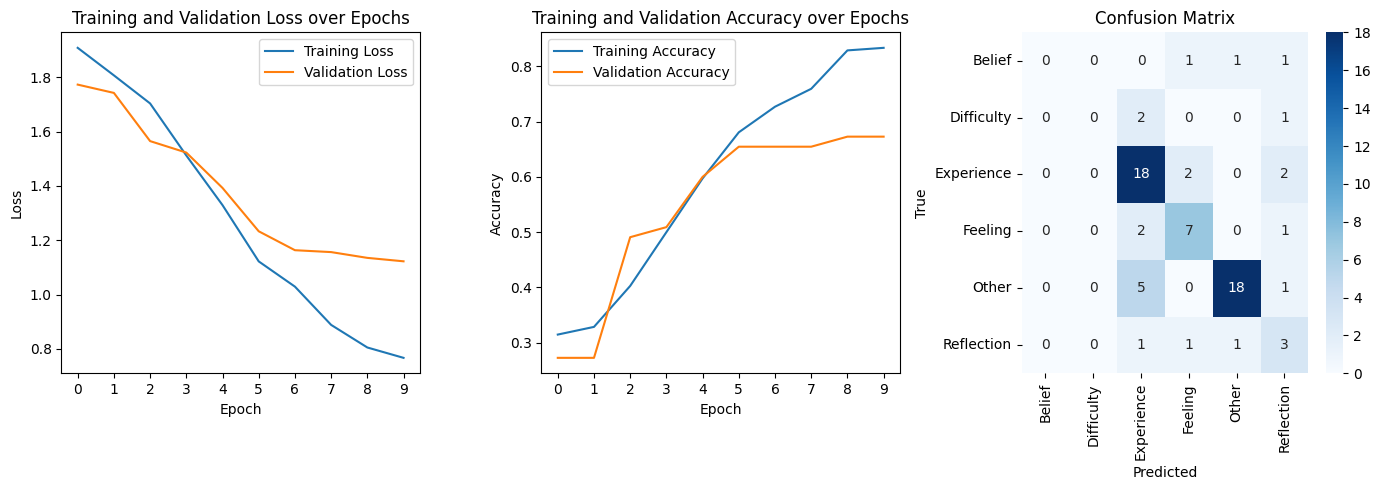

In [9]:
############ First run with cluster ############
# HP
batch_size, epochs, learning_rate = 5, 10, 2e-5
# dataset : train

train_losses  = [1.9087509648366408, 1.8073150542649357, 1.703871488571167, 1.5121451196345417, 1.3292951543222775, 1.1219928366216747, 1.0290418125011704, 0.8880957900123163, 0.8048251399939711, 0.7666721987453374]

val_losses = [1.7732937335968018, 1.742677786133506, 1.5651441379026934, 1.5228723937814885, 1.3926318450407549, 1.2329413999210705, 1.16321753913706, 1.156250769441778, 1.1349766146052966, 1.12231092561375]

avg_train_acc_per_epoch = [0.3148148148148148, 0.3287037037037037, 0.4027777777777778, 0.5, 0.5972222222222222, 0.6805555555555556, 0.7268518518518519, 0.7592592592592593, 0.8287037037037037, 0.8333333333333334]

avg_val_acc_per_epoch = [0.2727272727272727, 0.2727272727272727, 0.4909090909090909, 0.509090909090909, 0.6, 0.6545454545454545, 0.6545454545454545, 0.6545454545454545, 0.6727272727272727, 0.6727272727272727]

cm = [[0,  0,  0,  1,  1,  1],
      [0,  0,  2,  0,  0,  1],
      [0,  0, 18,  2,  0,  2],
      [0,  0,  2,  7,  0,  1],
      [0,  0,  5,  0, 18,  1],
      [0,  0,  1,  1,  1,  3]]

class_labels = ['Belief', 'Difficulty', 'Experience', 'Feeling', 'Other', 'Reflection']

plot_train_val_loss_acc(train_losses, val_losses, avg_train_acc_per_epoch, avg_val_acc_per_epoch, epochs, cm, class_labels, plot_cm = True)

Accuracy : 0.761


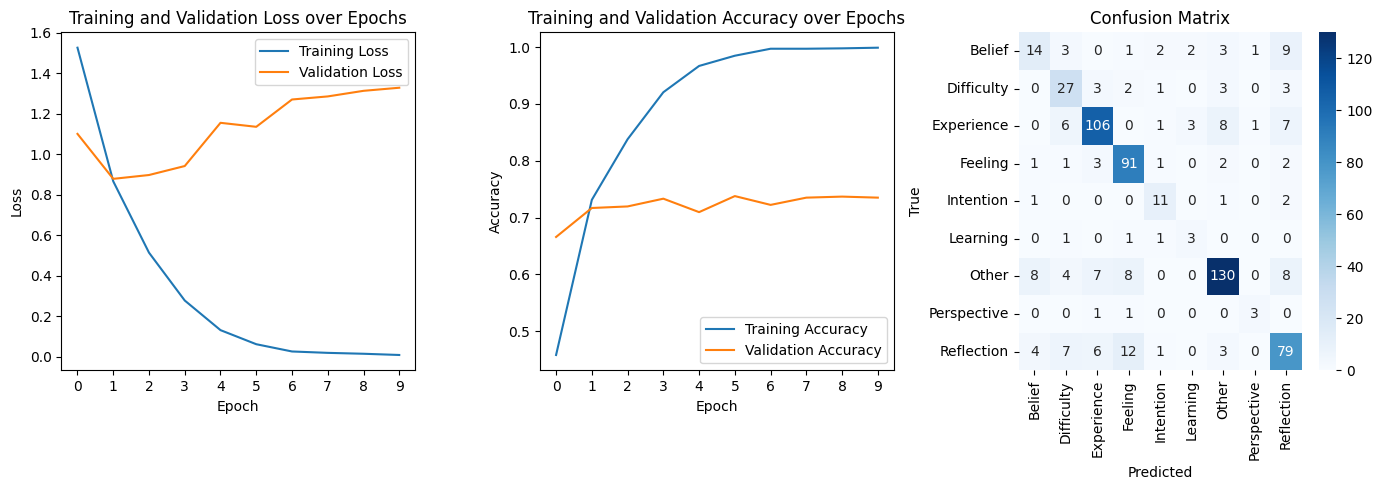

In [10]:
############ Second run with cluster ############
# HP
batch_size, epochs, learning_rate = 5, 10, 2e-5
# dataset : val

train_losses = [1.5251379612502314, 0.8657464472776394, 0.5136861663994832, 0.27752054984318536, 0.13133296291004434, 0.06187771936981453, 0.026019483876832526, 0.019196421002909744, 0.014755675168485213, 0.008717253410542736]

val_losses = [1.0998294741592625, 0.8779397760771892, 0.8968256038274954, 0.9411642421121624, 1.154428127346645, 1.1347126589410685, 1.269501162457957, 1.2846793736553412, 1.312288018205965, 1.3275638915963512]


avg_train_acc_per_epoch = [0.45806745670009114, 0.731084776663628, 0.837739288969918, 0.9204649042844121, 0.9667274384685506, 0.9847310847766636, 0.9970373746581586, 0.9970373746581586, 0.9977210574293528, 0.9988605287146763]


avg_val_acc_per_epoch = [0.6657559198542805, 0.7167577413479053, 0.7194899817850637, 0.7331511839708561, 0.7094717668488161, 0.7377049180327869, 0.7222222222222222, 0.7349726775956285, 0.7367941712204007, 0.7349726775956285]

Accuracy =  0.761
print(f"Accuracy : {Accuracy}")

cm = [[ 14,   3,   0,   1,   2,   2,   3,   1,   9],
      [  0,  27,   3,   2,   1,   0,   3,   0,   3],
      [  0,   6, 106,   0,   1,   3,   8,   1,   7],
      [  1,   1,   3,  91,   1,   0,   2,   0,   2],
      [  1,   0,   0,   0,  11,   0,   1,   0,   2],
      [  0,   1,   0,   1,   1,   3,   0,   0,   0],
      [  8,   4,   7,   8,   0,   0, 130,   0,   8],
      [  0,   0,   1,   1,   0,   0,   0,   3,   0],
      [  4,   7,   6,  12,   1,   0,   3,   0,  79]]

class_labels = ['Belief', 'Difficulty', 'Experience', 'Feeling', 'Intention', 'Learning', 'Other', 'Perspective', 'Reflection']

plot_train_val_loss_acc(train_losses, val_losses, avg_train_acc_per_epoch, avg_val_acc_per_epoch, epochs, cm, class_labels, plot_cm = True)

## CV per class

In [11]:
def create_dataframe(mean_train_loss, ci_train_loss, mean_val_loss, ci_val_loss, cat, dfs_train, dfs_val):
    # Create a DataFrame for Seaborn
    df_train_loss = pd.DataFrame({
        'Epochs': np.arange(epochs),
        'Mean Train Loss': mean_train_loss,
        'Lower CI': ci_train_loss[0],
        'Upper CI': ci_train_loss[1]})

    df_val_loss = pd.DataFrame({
        'Epochs': np.arange(epochs),
        'Mean Val Loss': mean_val_loss,
        'Lower CI': ci_val_loss[0],
        'Upper CI': ci_val_loss[1]})
    
    dfs_train[f'{cat}'] = df_train_loss
    dfs_val[f'{cat}'] = df_val_loss
    
    return dfs_train, dfs_val

In [17]:
dfs_train = {}
dfs_val = {}

reflective_categories = ['Experience', 'Feeling', 'Reflection']
n_splits = 5

#Category Experience
train_loss_array = [
    [0.48604976, 0.24101695, 0.1403095, 0.07183104, 0.03981404, 0.0201903, 0.01367982, 0.01136994, 0.0084694, 0.00583086],
    [0.3835743, 0.19389157, 0.08862334, 0.04681445, 0.02161122, 0.01391593, 0.00729978, 0.0053641, 0.00080632, 0.00081218],
    [0.45488833, 0.21791345, 0.10592048, 0.03608412, 0.01927751, 0.01300693, 0.00442088, 0.00630623, 0.00293878, 0.00146036],
    [0.36051068, 0.19425796, 0.09148913, 0.04538883, 0.02252015, 0.0120195, 0.00471065, 0.00528367, 0.00206947, 0.00083475],
    [0.56882681, 0.28876583, 0.16346203, 0.07747372, 0.0343119, 0.02309191, 0.01179402, 0.0060118, 0.00361045, 0.0005997]]

mean_train_loss = [0.45076997, 0.22716915, 0.1179609, 0.05551843, 0.02750696, 0.01644491, 0.00838103, 0.00686715, 0.00357888, 0.00190757]

ci_train_loss = [
    [0.36281704, 0.19392821, 0.08890992, 0.03701459, 0.01951088, 0.01211824, 0.00444986, 0.00529171, 0.00093264, 0.00062095],
    [0.56054911, 0.28399094, 0.16114677, 0.07690945, 0.03926382, 0.02280175, 0.01349124, 0.01086357, 0.0079835, 0.00539381]]

val_loss_array = [
    [0.2595807, 0.22549874, 0.21416469, 0.26819502, 0.32588357, 0.40190938, 0.5066867, 0.47890576, 0.44687, 0.44858913],
    [0.23609666, 0.23505276, 0.35460363, 0.41806102, 0.46890237, 0.64147343, 0.56826977, 0.55078996, 0.62486414, 0.6419941],
    [0.26104864, 0.24833209, 0.31043024, 0.42157289, 0.47794888, 0.64013015, 0.65200009, 0.60230683, 0.66646796, 0.69687352],
    [0.26918336, 0.27213084, 0.28963083, 0.38345934, 0.55930412, 0.5925973, 0.64455789, 0.66773997, 0.75052605, 0.77232783],
    [0.35179664, 0.28143596, 0.26368684, 0.30949242, 0.53882992, 0.55877292, 0.60220259, 0.65112428, 0.70537274, 0.73784937]]

mean_val_loss = [0.2755412, 0.25249008, 0.28650325, 0.36015614, 0.47417377, 0.56697664, 0.59474341, 0.59017336, 0.63882018, 0.65952679]

ci_val_loss = [
    [0.23844506, 0.22645414, 0.2191169, 0.27232476, 0.34018545, 0.41759573, 0.51284501, 0.48609418, 0.46466941, 0.46792963],
    [0.34353531, 0.28050545, 0.35018629, 0.4212217, 0.5572567, 0.6413391, 0.65125587, 0.6660784, 0.74601072, 0.76887998]]

dfs_train, dfs_val = create_dataframe(mean_train_loss, ci_train_loss, mean_val_loss, ci_val_loss, 'Experience', dfs_train, dfs_val)

#Category Feeling
train_loss_array = [
    [0.39657656, 0.14673269, 0.07840282, 0.04417147, 0.02484491, 0.01560431, 0.0114099, 0.00701659, 0.0041844, 0.0036184],
    [0.29257858, 0.11010826, 0.0589554, 0.02687169, 0.01847193, 0.01028119, 0.0077787, 0.00410785, 0.00310404, 0.00253114],
    [0.30656131, 0.1385917, 0.07069833, 0.0398489, 0.01872652, 0.01468156, 0.00565194, 0.00295923, 0.00128153, 0.00090905],
    [0.32327425, 0.13308236, 0.0713857, 0.04532913, 0.02239337, 0.01576037, 0.01004315, 0.00827771, 0.00459804, 0.00359554],
    [0.33372371, 0.13742132, 0.0801817, 0.04476474, 0.03231068, 0.0148411, 0.00854624, 0.00564637, 0.00260504, 0.00160839]]

mean_train_loss = [0.33054288, 0.13318727, 0.07192479, 0.04019719, 0.02334948, 0.01423371, 0.00868598, 0.00560155, 0.00315461, 0.0024525]

ci_train_loss = [
    [0.29397685, 0.11240567, 0.06012969, 0.02816941, 0.01849739, 0.01072123, 0.00586461, 0.00307409, 0.00141388, 0.00097898],
    [0.39029128, 0.14591859, 0.08000381, 0.04527269, 0.0315641, 0.01574476, 0.01127322, 0.0081516, 0.00455667, 0.00361611]]

val_loss_array = [
    [0.18328057, 0.24673998, 0.1503473, 0.20718197, 0.21947128, 0.25845461, 0.23454914, 0.25986516, 0.29691363, 0.30394801],
    [0.20572248, 0.17954035, 0.20286941, 0.21128596, 0.25769507, 0.26853803, 0.32131861, 0.28675871, 0.29641656, 0.30660847],
    [0.13600133, 0.13384087, 0.18811258, 0.18389283, 0.2274794, 0.23141567, 0.2385162, 0.25800063, 0.27170378, 0.27511516],
    [0.15454902, 0.16390632, 0.14651133, 0.19131459, 0.22763576, 0.19660438, 0.25752804, 0.21250208, 0.23992824, 0.24343426],
    [0.19005743, 0.20160791, 0.2167191, 0.26229972, 0.2332089, 0.29421907, 0.37079704, 0.42011686, 0.44899794, 0.44509149]]

mean_val_loss = [0.17392217, 0.18512709, 0.18091195, 0.21119501, 0.23309808, 0.24984635, 0.28454181, 0.28744869, 0.31079203, 0.31483948]

dfs_train, dfs_val = create_dataframe(mean_train_loss, ci_train_loss, mean_val_loss, ci_val_loss, 'Feeling', dfs_train, dfs_val)

#Category Reflection
train_loss_array = [[4.33085640e-01, 2.73094440e-01, 1.83777646e-01, 1.02585618e-01, 4.34028534e-02, 2.05842235e-02, 8.34740395e-03, 3.00850971e-03, 2.80814436e-03, 6.11743604e-04],
                    [4.38167456e-01, 2.91447506e-01, 2.15579677e-01, 1.29773942e-01, 5.25197455e-02, 2.12665324e-02, 1.10480900e-02, 5.65647098e-03, 2.94953816e-03, 6.84614403e-04],
                    [4.36015796e-01, 2.92597850e-01, 1.95733804e-01, 1.02815728e-01, 5.13389562e-02, 2.45491683e-02, 8.01813121e-03, 4.59389571e-03, 3.55360055e-03, 6.08992200e-04],
                    [4.04673486e-01, 2.52402012e-01, 1.57116849e-01, 6.82374156e-02, 3.26237299e-02, 1.47405768e-02, 5.56311734e-03, 2.99706627e-03, 2.42528480e-03, 2.84238066e-04],
                    [4.36153445e-01, 2.82904722e-01, 2.07308110e-01, 1.13536646e-01, 5.04789509e-02, 2.03387842e-02, 1.31994412e-02, 5.41249754e-03, 1.20790435e-03, 1.33787814e-03]]
mean_train_loss = [0.42961916, 0.27848931, 0.19190322, 0.10338987, 0.04607285, 0.02029586, 0.00923524, 0.00433369, 0.00258889, 0.00070549]

ci_train_loss = [
    [4.07514701e-01, 2.54471255e-01, 1.59782928e-01, 7.16722358e-02, 3.37016423e-02, 1.53003976e-02, 5.80861873e-03, 2.99821062e-03, 1.32964239e-03, 3.16713480e-04],
    [4.37966055e-01, 2.92482816e-01, 2.14752521e-01, 1.28150213e-01, 5.24016666e-02, 2.42209047e-02, 1.29843061e-02, 5.63207364e-03, 3.49319431e-03, 1.27255177e-03]]

val_loss_array = [
    [0.33153265, 0.27640764, 0.33529126, 0.34643058, 0.50549385, 0.59410517, 0.67081452, 0.74427689, 0.73943149, 0.76129465],
    [0.29091835, 0.25827204, 0.25236841, 0.30342099, 0.40558023, 0.46648464, 0.54970813, 0.61180424, 0.66570195, 0.65609869],
    [0.30825116, 0.24968512, 0.25340588, 0.29228861, 0.39154938, 0.4967137, 0.61134711 , 0.67112732, 0.65371883, 0.68281774],
    [0.27872826, 0.24150133, 0.26591707, 0.3381333,  0.43299744, 0.5441443, 0.63689817 , 0.64394753, 0.66347124, 0.67550391],
    [0.31823614, 0.28616342, 0.28801188, 0.36830264, 0.46693214, 0.60928328, 0.59262221, 0.67943417, 0.76140149, 0.75161618]]

mean_val_loss = [0.30553331, 0.26240591, 0.2789989, 0.32971522, 0.44051061, 0.54214622, 0.61227803, 0.67011803, 0.696745, 0.70546623]

ci_val_loss = [
    [0.27994727, 0.24231971, 0.25247215, 0.29340185, 0.39295246, 0.46950755, 0.55399954, 0.61501857, 0.65469407, 0.65803921],
    [0.330203, 0.28518784, 0.33056332, 0.36611543, 0.50163768, 0.60776546, 0.66742289, 0.73779262, 0.75920449, 0.7603268]]

dfs_train, dfs_val = create_dataframe(mean_train_loss, ci_train_loss, mean_val_loss, ci_val_loss, 'Reflection', dfs_train, dfs_val)

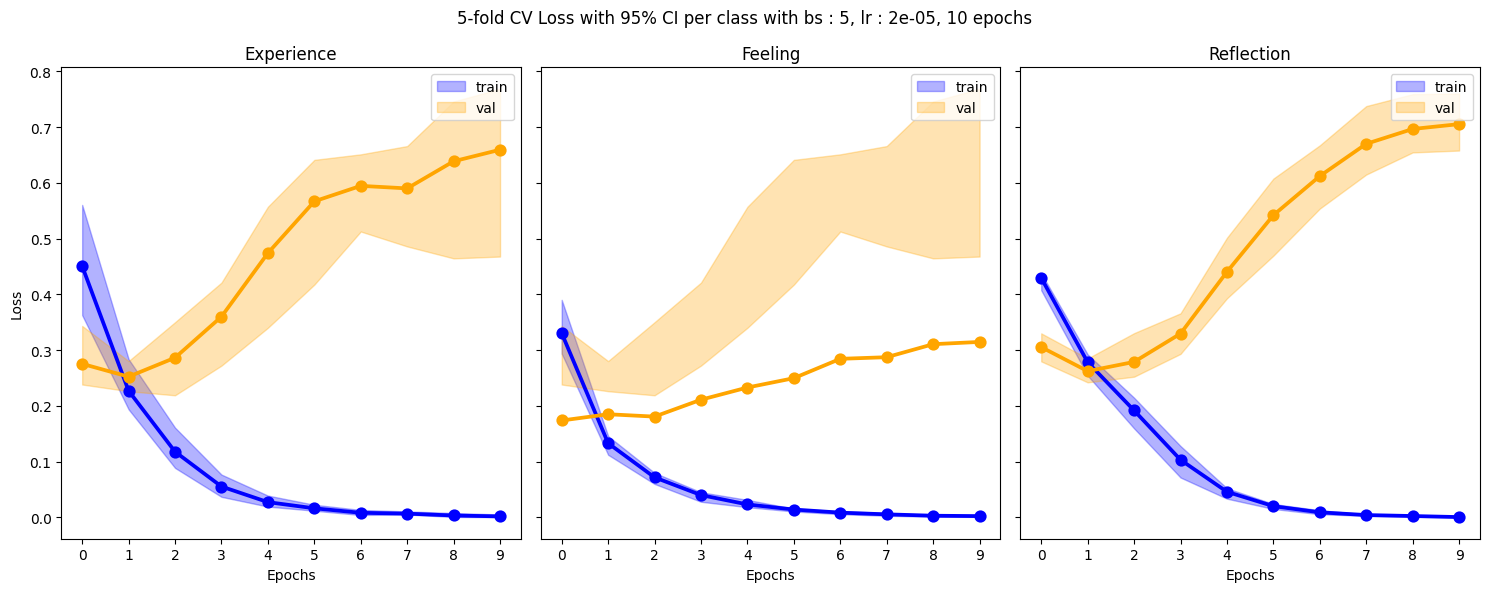

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey = True)  

# Sample iteration over the dictionary to plot subplots
for i, cat in enumerate(reflective_categories):
    df_train = dfs_train[cat]
    df_val = dfs_val[cat]
    ax = axs[i] #axs[i // 4, i % 4]
    
    # Mean lineplot
    sns.pointplot(data=df_train, x='Epochs', y='Mean Train Loss', color='blue', ax = ax)
    sns.pointplot(data=df_val, x='Epochs', y='Mean Val Loss', color='orange', ax = ax) 
    
    # Fill between the confidence interval
    ax.fill_between(df_train['Epochs'], df_train['Lower CI'], df_train['Upper CI'], color='blue', alpha=0.3, label = 'train')
    ax.fill_between(df_val['Epochs'], df_val['Lower CI'], df_val['Upper CI'], color='orange', alpha=0.3, label = 'val')
    
    #ax.set_xticks(np.arange(len(training_examples)), training_examples)
    ax.set_xlabel('Epochs')
    ax.set_ylabel("Loss")
    ax.set_title(f"{cat}") 
    ax.legend()

plt.suptitle(f"{n_splits}-fold CV Loss with 95% CI per class with bs : {batch_size}, lr : {learning_rate}, {epochs} epochs")
plt.tight_layout()
plt.show()

# Multiclass CLF with CV

In [21]:
def plot_multiclass_CV(train_loss_list, val_loss_list, train_acc_list, val_acc_list, n_splits, epochs):
    
    train_loss_array = np.array(train_loss_list).reshape(n_splits,epochs)
    mean_train_loss = np.mean(train_loss_array, axis=0)
    ci_train_loss = np.percentile(train_loss_array, [2.5, 97.5], axis=0)

    val_loss_array = np.array(val_loss_list).reshape(n_splits,epochs)
    mean_val_loss = np.mean(val_loss_array, axis=0)
    ci_val_loss = np.percentile(val_loss_array, [2.5, 97.5], axis=0)

    # Create a DataFrame for Seaborn
    df_train_loss = pd.DataFrame({
        'Epochs': np.arange(epochs),
        'Mean Train Loss': mean_train_loss,
        'Lower CI': ci_train_loss[0],
        'Upper CI': ci_train_loss[1]})

    df_val_loss = pd.DataFrame({
        'Epochs': np.arange(epochs),
        'Mean Val Loss': mean_val_loss,
        'Lower CI': ci_val_loss[0],
        'Upper CI': ci_val_loss[1]})

    # Code for Accuracy Plot (Second Subplot)
    train_acc_array = np.array(train_acc_list).reshape(n_splits, epochs)
    val_acc_array = np.array(val_acc_list).reshape(n_splits, epochs)
    ci_train_acc = np.percentile(train_acc_array, [2.5, 97.5], axis=0)

    mean_train_acc = np.mean(train_acc_array, axis=0)
    mean_val_acc = np.mean(val_acc_array, axis=0)
    ci_val_acc = np.percentile(val_acc_array, [2.5, 97.5], axis=0)

    df_train_acc = pd.DataFrame({
        'Epochs': np.arange(epochs), 
        'Mean Train Accuracy': mean_train_acc,
        'Lower CI': ci_train_acc[0],
        'Upper CI': ci_train_acc[1]})

    df_val_acc = pd.DataFrame({
        'Epochs': np.arange(epochs),
        'Mean Val Accuracy': mean_val_acc,
        'Lower CI': ci_val_acc[0],
        'Upper CI': ci_val_acc[1]})

    #df_train_loss.head()
    #df_val_loss.head()

    fig, axs = plt.subplots(1,2, figsize=(12,5))
    # Plot the mean accuracy line
    sns.pointplot(data=df_train_loss, x='Epochs', y='Mean Train Loss', color='blue', ax = axs[0])
    sns.pointplot(data=df_val_loss, x='Epochs', y='Mean Val Loss', color='orange', ax = axs[0])

    sns.pointplot(data=df_train_acc, x='Epochs', y='Mean Train Accuracy', color='blue', ax = axs[1])
    sns.pointplot(data=df_val_acc, x='Epochs', y='Mean Val Accuracy', color='orange', ax = axs[1])

    # Fill between the confidence interval
    axs[0].fill_between(df_train_loss['Epochs'], df_train_loss['Lower CI'], df_train_loss['Upper CI'], color='blue', alpha=0.3, label = 'train')
    axs[0].fill_between(df_val_loss['Epochs'], df_val_loss['Lower CI'], df_val_loss['Upper CI'], color='orange', alpha=0.3, label = 'val')
    axs[0].legend()
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('CV Loss with 95% CI')

    axs[1].fill_between(df_train_acc['Epochs'], df_train_acc['Lower CI'], df_train_acc['Upper CI'], color='blue', alpha=0.3, label = 'train')
    axs[1].fill_between(df_val_acc['Epochs'], df_val_acc['Lower CI'], df_val_acc['Upper CI'], color='orange', alpha=0.3, label = 'val')

    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('CV Accuracy with 95% CI')

    plt.legend()
    plt.show()

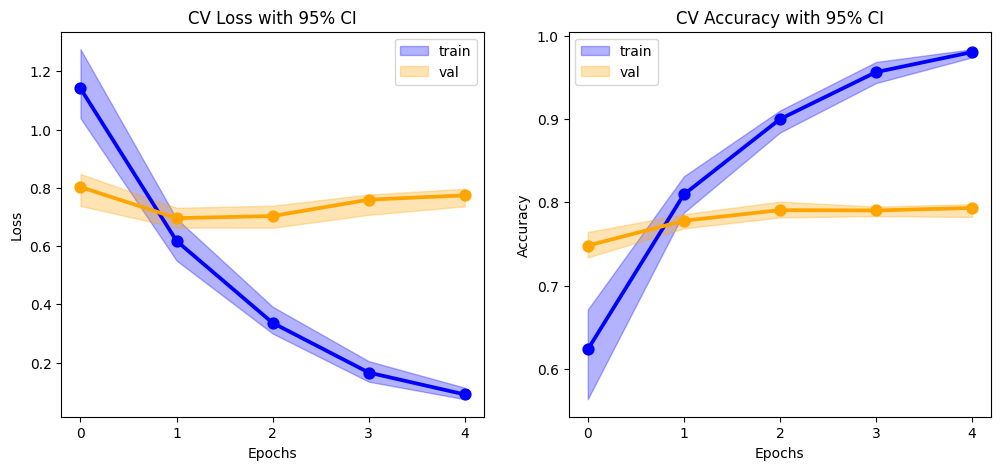

In [23]:
n_splits = 5
epochs = 5

train_loss_list = [1.2855766197950969, 0.6953817449143074, 0.37330473415149845, 0.18625002215465009, 0.09734277374941507, 1.0774427245329754, 0.5474395384580778, 0.30083082821311913, 0.14767345779121216, 0.07758249361205644, 1.18784486874571, 0.6836748041652987, 0.3940813269099138, 0.20721118240227254, 0.11586901900161223, 1.0346855873728327, 0.5761461303041779, 0.29992714738977955, 0.13329828007724778, 0.07410729279686591, 1.1201523492855978, 0.5859210407976153, 0.3141127382345461, 0.15557286692920871, 0.08891843396096762]

val_loss_list = [0.8302311407416825, 0.7165867595926044, 0.7268632018835995, 0.7741708029776547, 0.7721448896680115, 0.7355104650803438, 0.6620108344570155, 0.6615109177834289, 0.7003292228355564, 0.732666328965547, 0.8486498133169385, 0.733222078370649, 0.7111460828024336, 0.7703823970051439, 0.7930801671995656, 0.838577950109295, 0.6754865835486786, 0.6765813504925041, 0.7774451917484696, 0.7759768141664594, 0.7615992092916112, 0.6924257704064133, 0.7399896711778394, 0.7747693986441265, 0.7971898643776598]

train_acc_list = [0.5580478185851615, 0.7870347547448854, 0.8888341138772492, 0.9487305891052502, 0.9807739709144688, 0.6428395366034015, 0.8318954892777914, 0.9102785309341879, 0.9605619916194232, 0.9834853339906334, 0.6116313454903893, 0.7915229176934451, 0.8831936914736324, 0.9425825529817644, 0.9733859043863973, 0.6742237555446032, 0.8250369640216856, 0.9100542138984722, 0.9694430754066042, 0.9839822572695909, 0.6291276490882208, 0.8114834894036471, 0.9070970921636274, 0.9608181370133071, 0.9807787087235091]

val_acc_list = [0.7339901477832512, 0.7724137931034483, 0.7812807881773399, 0.7921182266009852, 0.7970443349753694, 0.7635467980295566, 0.7832512315270936, 0.7921182266009852, 0.7940886699507389, 0.7960591133004926, 0.7445759368836292, 0.7682445759368837, 0.7859960552268245, 0.7830374753451677, 0.7810650887573964, 0.7337278106508875, 0.7859960552268245, 0.8017751479289941, 0.7948717948717948, 0.7978303747534516, 0.7642998027613412, 0.7790927021696252, 0.7919132149901381, 0.7869822485207101, 0.7938856015779092]

plot_multiclass_CV(train_loss_list, val_loss_list, train_acc_list, val_acc_list, n_splits, epochs)

In [26]:
def test_multiclass_CV(true_labels, predicted_labels, pred_confidence, class_labels):
    # Generate classification report
    report = classification_report(true_labels, predicted_labels, zero_division = 1, target_names=class_labels)
    print(report)
    # Create confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    # Subplot 1: Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, ax=axs[0])
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("True")
    axs[0].set_title("Confusion Matrix")
    # Subplot 2: Confidence Scores Histogram
    axs[1].hist(pred_confidence, bins=50)
    axs[1].set_xlabel('Confidence score')
    axs[1].set_ylabel('Number of predictions')
    axs[1].set_title('Confidence score of predictions')
    plt.tight_layout()
    plt.show()

In [62]:
predicted_labels = ['Experience' 'Feeling' 'Other' 'Other' 'Feeling' 'Experience' 'Feeling'
'Feeling' 'Experience' 'Experience' 'Feeling' 'Feeling' 'Feeling'
'Belief' 'Feeling' 'Experience' 'Feeling' 'Difficulties' 'Other' 'Other'
'Feeling' 'Experience' 'Experience' 'Experience' 'Feeling' 'Feeling'
'Feeling' 'Feeling' 'Learning' 'Belief' 'Belief' 'Learning' 'Other'
'Difficulties' 'Belief' 'Feeling' 'Feeling' 'Feeling' 'Feeling' 'Feeling'
'Other' 'Feeling' 'Belief' 'Belief' 'Other' 'Belief' 'Experience' 'Other'
'Feeling' 'Experience' 'Experience' 'Experience' 'Experience'
'Experience' 'Experience' 'Other' 'Experience' 'Belief' 'Feeling'
'Experience' 'Belief' 'Experience' 'Feeling' 'Feeling' 'Experience'
'Other' 'Experience' 'Learning' 'Experience' 'Belief' 'Experience'
'Experience' 'Experience' 'Experience' 'Other' 'Other' 'Experience'
'Other' 'Belief' 'Feeling' 'Feeling' 'Feeling' 'Other' 'Other' 'Other'
'Experience' 'Experience' 'Other' 'Belief' 'Other' 'Other' 'Other'
'Other' 'Other' 'Experience' 'Other' 'Feeling' 'Experience' 'Experience'
'Other' 'Experience' 'Experience' 'Feeling' 'Other' 'Experience'
'Experience' 'Experience' 'Difficulties' 'Experience' 'Belief' 'Feeling'
'Difficulties' 'Difficulties' 'Difficulties' 'Feeling' 'Difficulties'
'Intention' 'Other' 'Experience' 'Experience' 'Experience' 'Experience'
'Feeling' 'Other' 'Experience' 'Feeling' 'Feeling' 'Feeling'
'Difficulties' 'Experience' 'Feeling' 'Other' 'Other' 'Experience'
'Experience' 'Other' 'Difficulties' 'Experience' 'Other' 'Feeling'
'Feeling' 'Other' 'Other' 'Feeling' 'Experience' 'Experience' 'Feeling'
'Feeling' 'Other' 'Experience' 'Experience' 'Other' 'Other' 'Other'
'Belief' 'Difficulties' 'Learning' 'Feeling' 'Other' 'Feeling' 'Other'
'Experience' 'Other' 'Other' 'Feeling' 'Difficulties' 'Feeling' 'Feeling'
'Feeling' 'Feeling' 'Feeling' 'Experience' 'Experience' 'Feeling'
'Feeling' 'Feeling' 'Other' 'Other' 'Difficulties' 'Other' 'Experience'
'Other' 'Experience' 'Experience' 'Experience' 'Feeling' 'Feeling'
'Experience' 'Other' 'Learning' 'Learning' 'Learning' 'Feeling' 'Feeling'
'Feeling' 'Learning' 'Learning' 'Belief' 'Feeling' 'Experience'
'Difficulties' 'Experience' 'Experience' 'Experience' 'Experience'
'Experience' 'Difficulties' 'Difficulties' 'Other' 'Experience' 'Feeling'
'Other' 'Other' 'Experience' 'Other' 'Experience' 'Experience' 'Other'
'Experience' 'Other' 'Other' 'Experience' 'Feeling' 'Experience'
'Feeling' 'Other' 'Other' 'Other' 'Feeling' 'Feeling' 'Feeling' 'Other'
'Other' 'Other' 'Experience' 'Other' 'Perspective' 'Perspective' 'Other'
'Feeling' 'Experience' 'Experience' 'Experience' 'Belief' 'Feeling'
'Experience' 'Other' 'Experience' 'Other' 'Experience' 'Other' 'Other'
'Other' 'Other' 'Experience' 'Belief' 'Belief' 'Other' 'Other' 'Belief'
'Belief' 'Experience' 'Experience' 'Experience' 'Learning' 'Feeling'
'Experience' 'Other' 'Feeling' 'Feeling' 'Feeling' 'Other' 'Experience'
'Other' 'Belief' 'Belief' 'Feeling' 'Experience' 'Feeling' 'Other'
'Experience' 'Other' 'Other' 'Experience' 'Experience' 'Experience'
'Experience' 'Feeling' 'Experience' 'Other' 'Feeling' 'Belief' 'Other'
'Other' 'Other' 'Other' 'Other' 'Other' 'Other']

true_labels = ['Experience' 'Feeling' 'Other' 'Difficulties' 'Feeling' 'Experience'
'Feeling' 'Feeling' 'Experience' 'Learning' 'Feeling' 'Feeling' 'Feeling'
'Other' 'Feeling' 'Experience' 'Feeling' 'Difficulties' 'Difficulties'
'Other' 'Feeling' 'Other' 'Feeling' 'Experience' 'Feeling' 'Feeling'
'Feeling' 'Feeling' 'Learning' 'Belief' 'Feeling' 'Learning' 'Other'
'Belief' 'Other' 'Feeling' 'Feeling' 'Feeling' 'Feeling' 'Feeling'
'Feeling' 'Feeling' 'Other' 'Experience' 'Experience' 'Experience'
'Experience' 'Other' 'Feeling' 'Other' 'Experience' 'Experience'
'Experience' 'Experience' 'Experience' 'Experience' 'Other' 'Other'
'Other' 'Experience' 'Belief' 'Experience' 'Feeling' 'Feeling' 'Feeling'
'Other' 'Other' 'Belief' 'Experience' 'Difficulties' 'Experience'
'Experience' 'Experience' 'Experience' 'Other' 'Other' 'Experience'
'Other' 'Other' 'Feeling' 'Feeling' 'Feeling' 'Belief' 'Belief' 'Other'
'Experience' 'Experience' 'Other' 'Other' 'Intention' 'Other' 'Other'
'Other' 'Experience' 'Difficulties' 'Other' 'Feeling' 'Experience'
'Experience' 'Belief' 'Experience' 'Experience' 'Feeling' 'Other'
'Experience' 'Difficulties' 'Experience' 'Difficulties' 'Experience'
'Difficulties' 'Feeling' 'Difficulties' 'Difficulties' 'Experience'
'Feeling' 'Belief' 'Other' 'Other' 'Other' 'Perspective' 'Experience'
'Experience' 'Feeling' 'Other' 'Experience' 'Experience' 'Feeling'
'Feeling' 'Difficulties' 'Experience' 'Other' 'Other' 'Other'
'Experience' 'Experience' 'Other' 'Feeling' 'Experience' 'Other'
'Feeling' 'Feeling' 'Other' 'Other' 'Feeling' 'Experience' 'Experience'
'Feeling' 'Feeling' 'Other' 'Experience' 'Experience' 'Other' 'Other'
'Other' 'Belief' 'Difficulties' 'Learning' 'Feeling' 'Other' 'Feeling'
'Belief' 'Experience' 'Other' 'Other' 'Feeling' 'Difficulties' 'Feeling'
'Feeling' 'Feeling' 'Feeling' 'Feeling' 'Experience' 'Experience'
'Feeling' 'Feeling' 'Feeling' 'Other' 'Other' 'Feeling' 'Experience'
'Experience' 'Other' 'Experience' 'Other' 'Experience' 'Experience'
'Feeling' 'Experience' 'Other' 'Learning' 'Learning' 'Learning'
'Learning' 'Learning' 'Learning' 'Learning' 'Learning' 'Belief' 'Feeling'
'Experience' 'Difficulties' 'Experience' 'Experience' 'Experience'
'Experience' 'Difficulties' 'Difficulties' 'Difficulties' 'Other'
'Experience' 'Feeling' 'Other' 'Experience' 'Experience' 'Other' 'Belief'
'Experience' 'Other' 'Experience' 'Other' 'Belief' 'Difficulties'
'Feeling' 'Experience' 'Difficulties' 'Other' 'Other' 'Other' 'Feeling'
'Difficulties' 'Feeling' 'Other' 'Difficulties' 'Other' 'Experience'
'Experience' 'Perspective' 'Perspective' 'Belief' 'Experience' 'Other'
'Experience' 'Experience' 'Difficulties' 'Feeling' 'Experience' 'Other'
'Experience' 'Other' 'Experience' 'Other' 'Feeling' 'Belief' 'Other'
'Belief' 'Belief' 'Belief' 'Belief' 'Other' 'Belief' 'Other' 'Experience'
'Feeling' 'Experience' 'Learning' 'Experience' 'Experience' 'Other'
'Feeling' 'Feeling' 'Feeling' 'Other' 'Experience' 'Other' 'Belief'
'Belief' 'Other' 'Experience' 'Feeling' 'Experience' 'Experience' 'Other'
'Other' 'Experience' 'Experience' 'Experience' 'Other' 'Other'
'Experience' 'Other' 'Feeling' 'Other' 'Experience' 'Experience' 'Other'
'Other' 'Other' 'Other' 'Other']

pred_confidence = [0.5233806, 0.9940807, 0.98787606, 0.82228214, 0.99524623, 0.9959567, 0.99323845, 0.99484634, 0.92359173, 0.67025226, 0.9951715, 0.99535733, 0.9943926, 0.8061422, 0.9954867, 0.9927527, 0.99541485, 0.5722996, 0.61692333, 0.98691535, 0.99536914, 0.52078843, 0.3354372, 0.9941929, 0.9939574, 0.99546885, 0.9943942, 0.995503, 0.65578675, 0.6321156, 0.86054766, 0.55335855, 0.99546707, 0.6451155, 0.90406835, 0.99489367, 0.9955651, 0.994416, 0.99529064, 0.86233324, 0.98376924, 0.9950912, 0.76413685, 0.4737259, 0.56722504, 0.7636049, 0.9959699, 0.9965558, 0.994987, 0.99283546, 0.9889542, 0.9960543, 0.99607676, 0.99287343, 0.9866348, 0.865032, 0.99297273, 0.69900453, 0.50813645, 0.98636776, 0.5456491, 0.95854455, 0.9945239, 0.9952401, 0.9922138, 0.982942, 0.69683397, 0.6666343, 0.99627113, 0.5691588, 0.99503124, 0.99267185, 0.99617624, 0.9454993, 0.99224734, 0.8852298, 0.99602133, 0.9937815, 0.9455957, 0.9946045, 0.99508613, 0.9922409, 0.9898581, 0.92491, 0.996326, 0.99526393, 0.9951983, 0.98498267, 0.85205555, 0.7583627, 0.97919065, 0.95135665, 0.9916431, 0.65161633, 0.5817416, 0.8108735, 0.99088573, 0.98870826, 0.9903222, 0.71234477, 0.99446243, 0.9723707, 0.9766212, 0.9943758, 0.99517244, 0.49104667, 0.99285626, 0.8696984, 0.99439347, 0.58689904, 0.99385685, 0.98114645, 0.98114645, 0.59743255, 0.99493283, 0.67528373, 0.8517645, 0.7218128, 0.982421, 0.7176926, 0.9946867, 0.99342066, 0.99124837, 0.97218037, 0.9341621, 0.79266834, 0.79868424, 0.8487242, 0.76057744, 0.99376124, 0.9772768, 0.991413, 0.74397624, 0.93570775, 0.99285334, 0.9942181, 0.4633433, 0.9957991, 0.99563867, 0.99523455, 0.9934801, 0.9962309, 0.7335576, 0.99489033, 0.99006325, 0.9901578, 0.99521047, 0.9950583, 0.99506605, 0.9956915, 0.99463755, 0.99437153, 0.99502325, 0.99359316, 0.83333224, 0.924737, 0.7739723, 0.9954377, 0.9898694, 0.9950853, 0.9730871, 0.8967806, 0.9912874, 0.95827913, 0.9951486, 0.78849643, 0.9953393, 0.9951845, 0.9943777, 0.99369025, 0.9941911, 0.98774475, 0.9915872, 0.9918045, 0.9949522, 0.95501465, 0.9950905, 0.9958038, 0.93231326, 0.8632884, 0.994839, 0.9844319, 0.99094385, 0.96230155, 0.9937594, 0.98318636, 0.87345266, 0.9960395, 0.77771056, 0.50408727, 0.59492815, 0.7958144, 0.9955772, 0.9831913, 0.9934731, 0.58784854, 0.629181, 0.8314281, 0.99406624, 0.9945334, 0.9287252, 0.9960802, 0.9890671, 0.9956132, 0.9835406, 0.9677018, 0.7541084, 0.84556776, 0.8535747, 0.99377716, 0.9955367, 0.918245, 0.8307929, 0.99647313, 0.98173577, 0.3934408, 0.9900463, 0.82922804, 0.71952564, 0.9910902, 0.96025413, 0.7799592, 0.9951638, 0.9674219, 0.911987, 0.8830427, 0.9369002, 0.99289954, 0.69555146, 0.777867, 0.9949443, 0.9815911, 0.83568, 0.9217509, 0.9779995, 0.5397, 0.7628785, 0.6200786, 0.49556398, 0.9885916, 0.9807897, 0.99532205, 0.98056245, 0.7769398, 0.87671554, 0.71204346, 0.9912141, 0.99366343, 0.9957605, 0.99532914, 0.9953589, 0.9935364, 0.9210097, 0.99268794, 0.86115074, 0.9013605, 0.50663435, 0.8106729, 0.99507505, 0.81649315, 0.9682229, 0.9509771, 0.98639673, 0.39850944, 0.69961905, 0.9947693, 0.888689, 0.97600955, 0.9917235, 0.99370605, 0.99499375, 0.97952914, 0.96456605, 0.9941596, 0.97761476, 0.9355223, 0.5864167, 0.9804954, 0.9950052, 0.9348734, 0.958721, 0.9733899, 0.9942538, 0.9958605, 0.9957353, 0.9731522, 0.9405567, 0.64449406, 0.898361, 0.9949492, 0.99320203, 0.7108832, 0.9964992, 0.8551021, 0.99588364, 0.9964419, 0.99521905, 0.99665123, 0.98872465]

class_labels = ['Belief', 'Difficulties', 'Experience', 'Feeling', 'Intention', 'Learning', 'Other', 'Perspective']

              precision    recall  f1-score   support

      Belief       0.39      0.41      0.40        22
Difficulties       0.67      0.45      0.54        22
  Experience       0.79      0.82      0.80        88
     Feeling       0.82      0.88      0.85        69
   Intention       0.00      0.00      1.00         1
    Learning       0.90      0.69      0.78        13
       Other       0.72      0.74      0.73        81
 Perspective       1.00      0.67      0.80         3

    accuracy                           0.75       299
   macro avg       0.66      0.58      0.74       299
weighted avg       0.75      0.75      0.75       299



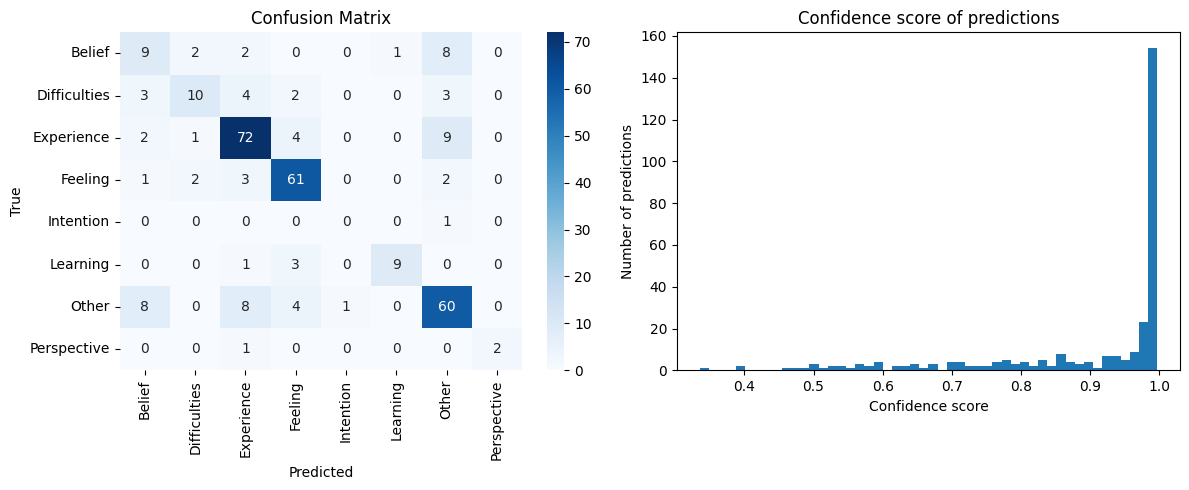

In [64]:
predicted_labels = ' '.join(predicted_labels)
true_labels = ' '.join(true_labels)
predicted_labels = re.sub(r'(?<!^)(?=[A-Z])', ' ', predicted_labels).split()
true_labels = re.sub(r'(?<!^)(?=[A-Z])', ' ', true_labels).split()

#print(predicted_labels)
#print(true_labels)

test_multiclass_CV(true_labels, predicted_labels, pred_confidence, class_labels)

---

# Multiple Binary CLF with CV

### Training/validation

In [134]:
experience = ''' 
   Epochs  Mean_Train_Loss  Lower_CI  Upper_CI
0       0         1.254403  1.139750  1.378552
1       1         0.812633  0.792624  0.830921
2       2         0.723290  0.700412  0.750591
3       3         0.684926  0.645418  0.710869
4       4         0.654047  0.581788  0.701147
''' 

feeling = ''' 
   Epochs  Mean_Train_Loss  Lower_CI  Upper_CI
0       0         1.070904  0.947382  1.209410
1       1         0.622923  0.578988  0.677957
2       2         0.538342  0.497192  0.582325
3       3         0.484401  0.459775  0.515422
4       4         0.460777  0.405784  0.495145
''' 

difficulty = ''' 
   Epochs  Mean_Train_Loss  Lower_CI  Upper_CI
0       0         0.886017  0.797376  0.971649
1       1         0.442699  0.405999  0.488279
2       2         0.367360  0.348885  0.395709
3       3         0.342197  0.326514  0.370142
4       4         0.327050  0.308168  0.355901
''' 

belief = ''' 
   Epochs  Mean_Train_Loss  Lower_CI  Upper_CI
0       0         0.925291  0.860679  1.004540
1       1         0.394946  0.361942  0.416843
2       2         0.351105  0.316871  0.384207
3       3         0.315089  0.299649  0.328679
4       4         0.299333  0.279207  0.314482
''' 

perspective = ''' 
   Epochs  Mean_Train_Loss  Lower_CI  Upper_CI
0       0         0.854608  0.758195  0.972084
1       1         0.192929  0.129819  0.248321
2       2         0.122075  0.063609  0.161764
3       3         0.105178  0.046099  0.142696
4       4         0.098070  0.039719  0.133762
''' 

learning = ''' 
   Epochs  Mean_Train_Loss  Lower_CI  Upper_CI
0       0         0.751738  0.685419  0.805442
1       1         0.162620  0.152293  0.180795
2       2         0.096395  0.081816  0.118155
3       3         0.074535  0.061441  0.091775
4       4         0.069315  0.055803  0.085900
''' 

intention = ''' 
   Epochs  Mean_Train_Loss  Lower_CI  Upper_CI
0       0         0.850452  0.772097  0.907939
1       1         0.181472  0.161166  0.196281
2       2         0.093437  0.080359  0.112232
3       3         0.070236  0.052537  0.089775
4       4         0.063899  0.045403  0.083214
''' 


In [ ]:
dfs_train = {}

# Convert the string data to a file-like object and read the data into a pandas DataFrame
dfs_train['Experience'] = pd.read_csv(io.StringIO(experience), delim_whitespace=True)
dfs_train['Feeling'] = pd.read_csv(io.StringIO(feeling), delim_whitespace=True)
dfs_train['Difficulty'] = pd.read_csv(io.StringIO(difficulty), delim_whitespace=True)
dfs_train['Belief'] = pd.read_csv(io.StringIO(belief), delim_whitespace=True)
dfs_train['Intention'] = pd.read_csv(io.StringIO(intention), delim_whitespace=True)
dfs_train['Perspective'] = pd.read_csv(io.StringIO(perspective), delim_whitespace=True)
dfs_train['Learning'] = pd.read_csv(io.StringIO(learning), delim_whitespace=True)

dfs_train['Experience'].head()

In [135]:
experience = ''' 
   Epochs  Mean_Val_Loss  Lower_CI  Upper_CI
0       0       0.876478  0.785733  1.009710
1       1       0.740230  0.703037  0.792239
2       2       0.688479  0.654021  0.730113
3       3       0.667675  0.643684  0.688108
4       4       0.644588  0.636527  0.651402
''' 

feeling = ''' 
   Epochs  Mean_Val_Loss  Lower_CI  Upper_CI
0       0       0.680404  0.601689  0.764560
1       1       0.593414  0.542218  0.676879
2       2       0.534442  0.494532  0.598164
3       3       0.498142  0.437610  0.573144
4       4       0.483651  0.422504  0.551213
''' 

difficulty = ''' 
   Epochs  Mean_Val_Loss  Lower_CI  Upper_CI
0       0       0.486881  0.448720  0.514090
1       1       0.399047  0.338163  0.444476
2       2       0.361446  0.307080  0.396404
3       3       0.347368  0.289870  0.385512
4       4       0.343980  0.283943  0.381665
''' 

belief = ''' 
   Epochs  Mean_Val_Loss  Lower_CI  Upper_CI
0       0       0.450812  0.436701  0.462176
1       1       0.355713  0.331287  0.371406
2       2       0.328308  0.299768  0.343856
3       3       0.316460  0.290425  0.332597
4       4       0.312543  0.288279  0.325755
''' 

perspective = ''' 
   Epochs  Mean_Val_Loss  Lower_CI  Upper_CI
0       0       0.270882  0.188673  0.341423
1       1       0.144736  0.072132  0.258286
2       2       0.124932  0.049876  0.247015
3       3       0.117538  0.042515  0.246671
4       4       0.116587  0.041975  0.247527
''' 

learning = ''' 
   Epochs  Mean_Val_Loss  Lower_CI  Upper_CI
0       0       0.236606  0.202681  0.261898
1       1       0.115837  0.098512  0.138021
2       2       0.088609  0.062056  0.114854
3       3       0.082155  0.055299  0.109472
4       4       0.080574  0.054249  0.107514
''' 

intention = ''' 
   Epochs  Mean_Val_Loss  Lower_CI  Upper_CI
0       0       0.269936  0.237280  0.318075
1       1       0.097928  0.076331  0.122634
2       2       0.068735  0.047259  0.094733
3       3       0.059438  0.038513  0.086776
4       4       0.056753  0.035964  0.084759
''' 


In [ ]:
dfs_val = {}

# Convert the string data to a file-like object and read the data into a pandas DataFrame
dfs_val['Experience'] = pd.read_csv(io.StringIO(experience), delim_whitespace=True)
dfs_val['Feeling'] = pd.read_csv(io.StringIO(feeling), delim_whitespace=True)
dfs_val['Difficulty'] = pd.read_csv(io.StringIO(difficulty), delim_whitespace=True)
dfs_val['Belief'] = pd.read_csv(io.StringIO(belief), delim_whitespace=True)
dfs_val['Intention'] = pd.read_csv(io.StringIO(intention), delim_whitespace=True)
dfs_val['Perspective'] = pd.read_csv(io.StringIO(perspective), delim_whitespace=True)
dfs_val['Learning'] = pd.read_csv(io.StringIO(learning), delim_whitespace=True)

dfs_val['Experience'].head()

In [136]:
experience = ''' 
   Epochs  Mean_Val_Acc  Lower_CI  Upper_CI
0       0       0.70297   0.64802  0.732673
1       1       0.70297   0.64802  0.732673
2       2       0.70297   0.64802  0.732673
3       3       0.70297   0.64802  0.732673
4       4       0.70297   0.64802  0.732673
''' 

feeling = ''' 
   Epochs  Mean_Val_Acc  Lower_CI  Upper_CI
0       0      0.838284  0.804455  0.860891
1       1      0.841584  0.813861  0.860891
2       2      0.841584  0.813861  0.860891
3       3      0.841584  0.813861  0.860891
4       4      0.841584  0.813861  0.860891
''' 

difficulty = ''' 
   Epochs  Mean_Val_Acc  Lower_CI  Upper_CI
0       0      0.917492  0.901485  0.939109
1       1      0.917492  0.901485  0.939109
2       2      0.917492  0.901485  0.939109
3       3      0.917492  0.901485  0.939109
4       4      0.917492  0.901485  0.939109
''' 

belief = ''' 
   Epochs  Mean_Val_Acc  Lower_CI  Upper_CI
0       0      0.930693  0.921287  0.940099
1       1      0.930693  0.921287  0.940099
2       2      0.930693  0.921287  0.940099
3       3      0.930693  0.921287  0.940099
4       4      0.930693  0.921287  0.940099
''' 

perspective = ''' 
   Epochs  Mean_Val_Acc  Lower_CI  Upper_CI
0       0      0.986799  0.962376       1.0
1       1      0.986799  0.962376       1.0
2       2      0.986799  0.962376       1.0
3       3      0.986799  0.962376       1.0
4       4      0.986799  0.962376       1.0
''' 

learning = ''' 
   Epochs  Mean_Val_Acc  Lower_CI  Upper_CI
0       0      0.990099  0.990099  0.990099
1       1      0.993399  0.990099  0.999505
2       2      0.993399  0.990099  0.999505
3       3      0.993399  0.990099  0.999505
4       4      0.993399  0.990099  0.999505
''' 

intention = ''' 
   Epochs  Mean_Val_Acc  Lower_CI  Upper_CI
0       0        0.9967  0.990594       1.0
1       1        0.9967  0.990594       1.0
2       2        0.9967  0.990594       1.0
3       3        0.9967  0.990594       1.0
4       4        0.9967  0.990594       1.0
''' 


In [ ]:
dfs_val_acc = {}

# Convert the string data to a file-like object and read the data into a pandas DataFrame
dfs_val_acc['Experience'] = pd.read_csv(io.StringIO(experience), delim_whitespace=True)
dfs_val_acc['Feeling'] = pd.read_csv(io.StringIO(feeling), delim_whitespace=True)
dfs_val_acc['Difficulty'] = pd.read_csv(io.StringIO(difficulty), delim_whitespace=True)
dfs_val_acc['Belief'] = pd.read_csv(io.StringIO(belief), delim_whitespace=True)
dfs_val_acc['Intention'] = pd.read_csv(io.StringIO(intention), delim_whitespace=True)
dfs_val_acc['Perspective'] = pd.read_csv(io.StringIO(perspective), delim_whitespace=True)
dfs_val_acc['Learning'] = pd.read_csv(io.StringIO(learning), delim_whitespace=True)

dfs_val_acc['Experience'].head()

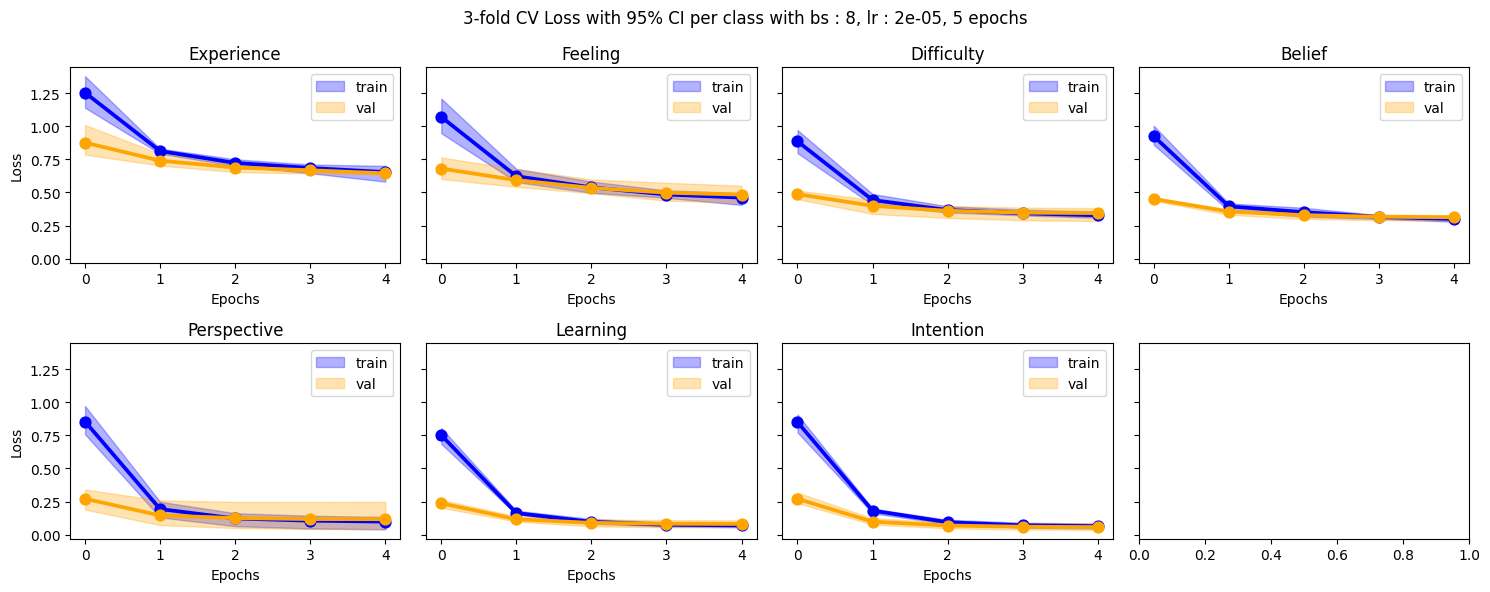

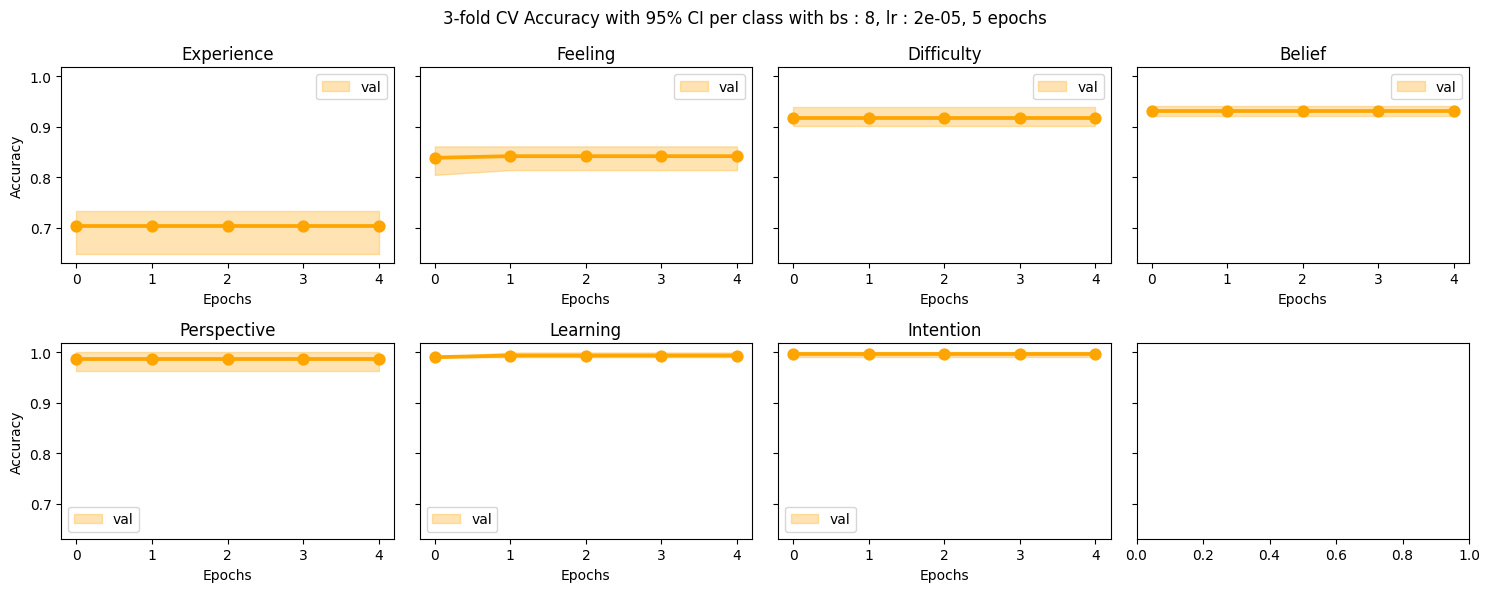

In [84]:
###### to copy ######
reflective_categories = ['Experience', 'Feeling', 'Difficulty', 'Belief', 'Perspective', 'Learning', 'Intention']
epochs = 5
n_splits = 3
batch_size = 8

#####################

fig, axs = plt.subplots(2, 4, figsize=(15, 6), sharey = True)  

# Sample iteration over the dictionary to plot subplots
for i, cat in enumerate(reflective_categories):
    df_train = dfs_train[cat]
    df_val = dfs_val[cat]
    ax = axs[i // 4, i % 4]
    
    # Mean lineplot
    sns.pointplot(data=df_train, x='Epochs', y='Mean_Train_Loss', color='blue', ax = ax)
    sns.pointplot(data=df_val, x='Epochs', y='Mean_Val_Loss', color='orange', ax = ax) 
    
    # Fill between the confidence interval
    ax.fill_between(df_train['Epochs'], df_train['Lower_CI'], df_train['Upper_CI'], color='blue', alpha=0.3, label = 'train')
    ax.fill_between(df_val['Epochs'], df_val['Lower_CI'], df_val['Upper_CI'], color='orange', alpha=0.3, label = 'val')
    
    #ax.set_xticks(np.arange(len(training_examples)), training_examples)
    ax.set_xlabel('Epochs')
    ax.set_ylabel("Loss")
    ax.set_title(f"{cat}") 
    ax.legend()

plt.suptitle(f"{n_splits}-fold CV Loss with 95% CI per class with bs : {batch_size}, lr : {learning_rate}, {epochs} epochs")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 4, figsize=(15, 6), sharey = True)  

# Sample iteration over the dictionary to plot subplots
for i, cat in enumerate(reflective_categories):
    df_acc = dfs_val_acc[cat]
    ax = axs[i // 4, i % 4]
    
    # Mean lineplot
    sns.pointplot(data=df_acc, x='Epochs', y='Mean_Val_Acc', color='orange', ax = ax) 
    
    # Fill between the confidence interval
    ax.fill_between(df_acc['Epochs'], df_acc['Lower_CI'], df_acc['Upper_CI'], color='orange', alpha=0.3, label = 'val')
    
    #ax.set_xticks(np.arange(len(training_examples)), training_examples)
    ax.set_xlabel('Epochs')
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{cat}") 
    ax.legend()

plt.suptitle(f"{n_splits}-fold CV Accuracy with 95% CI per class with bs : {batch_size}, lr : {learning_rate}, {epochs} epochs")
plt.tight_layout()
plt.show()

### Test dataset

In [126]:
accuracies_bin = [0.705685618729097, 0.7692307692307693, 0.9264214046822743, 0.9264214046822743, 0.9899665551839465, 0.9565217391304348, 0.9966555183946488]
class_labels = [['Experience', 'Other'], ['Feeling', 'Other'], ['Difficulty', 'Other'], ['Belief', 'Other'], ['Other', 'Perspective'], ['Learning', 'Other'], ['Intention', 'Other']]

predicted_labels_experience = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other']


predicted_labels_feeling = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other']


predicted_labels_difficulty = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other']


predicted_labels_belief = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other']


predicted_labels_perspective = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other']


predicted_labels_learning = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other']


predicted_labels_intention = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other']


true_labels_experience = ['Experience' 'Other' 'Other' 'Other' 'Other' 'Experience' 'Other' 'Other'
 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Experience' 'Experience' 'Experience' 'Experience' 'Other'
 'Other' 'Other' 'Experience' 'Experience' 'Experience' 'Experience'
 'Experience' 'Experience' 'Other' 'Other' 'Other' 'Experience' 'Other'
 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience'
 'Other' 'Experience' 'Experience' 'Experience' 'Experience' 'Other'
 'Other' 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Experience' 'Experience' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Experience' 'Other' 'Other' 'Other' 'Experience'
 'Experience' 'Other' 'Experience' 'Experience' 'Other' 'Other'
 'Experience' 'Other' 'Experience' 'Other' 'Experience' 'Other' 'Other'
 'Other' 'Other' 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Experience' 'Experience' 'Other' 'Other' 'Experience'
 'Experience' 'Other' 'Other' 'Other' 'Experience' 'Other' 'Other' 'Other'
 'Experience' 'Experience' 'Other' 'Other' 'Experience' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Experience' 'Experience' 'Other' 'Other'
 'Other' 'Experience' 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience'
 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience'
 'Experience' 'Other' 'Experience' 'Other' 'Experience' 'Experience'
 'Other' 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience' 'Other' 'Experience'
 'Experience' 'Experience' 'Experience' 'Other' 'Other' 'Other' 'Other'
 'Experience' 'Other' 'Other' 'Experience' 'Experience' 'Other' 'Other'
 'Experience' 'Other' 'Experience' 'Other' 'Other' 'Other' 'Other'
 'Experience' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Experience' 'Experience' 'Other' 'Other' 'Other'
 'Experience' 'Other' 'Experience' 'Experience' 'Other' 'Other'
 'Experience' 'Other' 'Experience' 'Other' 'Experience' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Experience' 'Other' 'Experience' 'Other' 'Experience' 'Experience'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Experience' 'Other' 'Other'
 'Other' 'Other' 'Experience' 'Other' 'Experience' 'Experience' 'Other'
 'Other' 'Experience' 'Experience' 'Experience' 'Other' 'Other'
 'Experience' 'Other' 'Other' 'Other' 'Experience' 'Experience' 'Other'
 'Other' 'Other' 'Other' 'Other']


true_labels_feeling = ['Other' 'Feeling' 'Other' 'Other' 'Feeling' 'Other' 'Feeling' 'Feeling'
 'Other' 'Other' 'Feeling' 'Feeling' 'Feeling' 'Other' 'Feeling' 'Other'
 'Feeling' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Feeling' 'Other'
 'Feeling' 'Feeling' 'Feeling' 'Feeling' 'Other' 'Other' 'Feeling' 'Other'
 'Other' 'Other' 'Other' 'Feeling' 'Feeling' 'Feeling' 'Feeling' 'Feeling'
 'Feeling' 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Feeling' 'Feeling'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Feeling' 'Feeling'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Other'
 'Feeling' 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Feeling' 'Feeling' 'Other'
 'Other' 'Feeling' 'Other' 'Other' 'Feeling' 'Feeling' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other'
 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Feeling'
 'Feeling' 'Feeling' 'Feeling' 'Feeling' 'Other' 'Other' 'Feeling'
 'Feeling' 'Feeling' 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Feeling' 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Feeling'
 'Feeling' 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Feeling' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other']


true_labels_difficulty = ['Other' 'Other' 'Other' 'Difficulty' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Difficulty' 'Difficulty' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Difficulty' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Difficulty' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Difficulty' 'Other' 'Difficulty' 'Other'
 'Difficulty' 'Other' 'Difficulty' 'Difficulty' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Difficulty' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Difficulty' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Difficulty' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Difficulty' 'Other'
 'Other' 'Other' 'Other' 'Difficulty' 'Difficulty' 'Difficulty' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Difficulty' 'Other' 'Other' 'Difficulty' 'Other'
 'Other' 'Other' 'Other' 'Difficulty' 'Other' 'Other' 'Difficulty' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Difficulty' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other']


true_labels_belief = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Belief' 'Other' 'Other' 'Other' 'Belief' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Belief' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Belief' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Belief' 'Belief' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Belief' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Belief' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Belief' 'Other' 'Other' 'Other' 'Other' 'Other' 'Belief' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Belief'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Belief'
 'Other' 'Other' 'Other' 'Other' 'Belief' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Belief' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Belief' 'Other' 'Belief' 'Belief' 'Belief' 'Belief' 'Other' 'Belief'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Belief' 'Belief' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other']


true_labels_perspective = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Perspective' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Perspective' 'Perspective' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other']


true_labels_learning = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Learning' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Learning' 'Other' 'Other' 'Learning' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Learning' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Learning' 'Learning' 'Learning' 'Learning'
 'Learning' 'Learning' 'Learning' 'Learning' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Learning' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other']


true_labels_intention = ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Intention' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other'
 'Other' 'Other' 'Other' 'Other']


pred_confidence_experience = [0.54478043, 0.6890633, 0.69636023, 0.6480746, 0.6991536, 0.64795285, 0.5995485, 0.59923273, 0.5363012, 0.58077997, 0.5710439, 0.57354295, 0.5626957, 0.52772164, 0.53795195, 0.6190871, 0.606486, 0.62196374, 0.7195513, 0.6536833, 0.6543165, 0.66250116, 0.5778973, 0.5306076, 0.52821463, 0.5998454, 0.48843858, 0.6270163, 0.59328425, 0.66356516, 0.64562786, 0.7382982, 0.6748658, 0.7091582, 0.64456326, 0.69285643, 0.62954795, 0.5552437, 0.59445584, 0.6187606, 0.71718824, 0.5508303, 0.73871756, 0.6754307, 0.41722834, 0.63310033, 0.5639281, 0.7188652, 0.5639478, 0.5312264, 0.46081328, 0.5360594, 0.5286886, 0.57998973, 0.57438034, 0.64015085, 0.6322702, 0.7273967, 0.55191, 0.60066617, 0.45724732, 0.5168721, 0.56739706, 0.62730736, 0.5792389, 0.6351168, 0.6514974, 0.58634675, 0.49351498, 0.610589, 0.5755588, 0.6491102, 0.5925753, 0.6221445, 0.65372324, 0.6390553, 0.6097969, 0.6874686, 0.7353032, 0.61787254, 0.68091327, 0.6360725, 0.7205082, 0.7046443, 0.67819923, 0.5390989, 0.5785711, 0.74971944, 0.71422595, 0.68016344, 0.5742427, 0.73975074, 0.6201376, 0.6105861, 0.5780342, 0.6983897, 0.5966931, 0.5932115, 0.5075524, 0.635861, 0.6354069, 0.5048172, 0.6005447, 0.70252585, 0.5637379, 0.58253497, 0.4567638, 0.59382284, 0.6097894, 0.5888756, 0.5956817, 0.65007746, 0.65007746, 0.6096876, 0.59739214, 0.43613538, 0.5926996, 0.62037504, 0.5730586, 0.57034206, 0.5827385, 0.6058662, 0.63919, 0.69995475, 0.5070624, 0.6588426, 0.54659724, 0.6496761, 0.67884195, 0.57311076, 0.6290083, 0.65386176, 0.5698489, 0.58178395, 0.6081886, 0.71395177, 0.6277389, 0.50542915, 0.74489355, 0.6347479, 0.66524416, 0.7048839, 0.6496553, 0.6444896, 0.5755527, 0.5952588, 0.6053322, 0.5888533, 0.7420956, 0.54496586, 0.5473997, 0.6817472, 0.64369535, 0.7244452, 0.6884679, 0.58368236, 0.6558667, 0.6541223, 0.72143894, 0.64058244, 0.6880847, 0.594309, 0.7541268, 0.5871892, 0.6281425, 0.64981693, 0.56819516, 0.55808085, 0.65404934, 0.5819168, 0.61470044, 0.5613528, 0.57005054, 0.523577, 0.6192827, 0.6025285, 0.73188114, 0.74681723, 0.6395792, 0.6157115, 0.5415788, 0.68851584, 0.5932801, 0.5945087, 0.5674312, 0.6220776, 0.43571174, 0.6025499, 0.62120795, 0.5912495, 0.74863523, 0.5894938, 0.57810843, 0.55214876, 0.6421279, 0.6568205, 0.7203206, 0.6434448, 0.7258689, 0.5659667, 0.571565, 0.56967276, 0.57230604, 0.5463324, 0.552736, 0.56444526, 0.48898557, 0.60528404, 0.688795, 0.5749403, 0.6817241, 0.74163985, 0.5693707, 0.5298569, 0.68340945, 0.67924666, 0.6307868, 0.6598501, 0.65821034, 0.6331259, 0.7036188, 0.6213084, 0.6056581, 0.58089805, 0.6305525, 0.6612155, 0.6793922, 0.7005695, 0.5715834, 0.53906757, 0.64088905, 0.7582093, 0.66744983, 0.6203807, 0.5342027, 0.69302905, 0.63404894, 0.61385065, 0.63938814, 0.570796, 0.51111245, 0.5574582, 0.555292, 0.70966554, 0.6150235, 0.5616548, 0.7166105, 0.58557296, 0.7688454, 0.54209065, 0.72702974, 0.6530148, 0.6806512, 0.7345852, 0.6052671, 0.7104629, 0.6431442, 0.7195802, 0.74926597, 0.68524575, 0.7408231, 0.5962228, 0.625825, 0.5965738, 0.6124732, 0.5958257, 0.6511102, 0.7179486, 0.6808927, 0.69142085, 0.63481086, 0.71306205, 0.5972717, 0.75174177, 0.7644121, 0.69079876, 0.61565197, 0.59185725, 0.6968092, 0.5741539, 0.60691535, 0.7032696, 0.69489586, 0.50559133, 0.57458013, 0.599055, 0.5528189, 0.56555045, 0.5999241, 0.70795727, 0.6149875, 0.7098246, 0.72231287, 0.71399236, 0.7123195, 0.72456425, 0.7370595, 0.6559481, 0.6625808]


pred_confidence_feeling = [0.45027226, 0.75463426, 0.7953755, 0.816397, 0.7117682, 0.7372003, 0.64101595, 0.77176857, 0.80658954, 0.7656973, 0.79295963, 0.7908112, 0.799399, 0.73566806, 0.7921906, 0.7891997, 0.768755, 0.8067311, 0.80612105, 0.81928927, 0.7773592, 0.73814833, 0.7608178, 0.78131443, 0.72611207, 0.71422684, 0.47036827, 0.7957299, 0.81416076, 0.67556685, 0.8101783, 0.8035353, 0.8152391, 0.80961096, 0.78062725, 0.7575977, 0.76074743, 0.7857398, 0.72301906, 0.74165004, 0.82909036, 0.77514803, 0.67483705, 0.7674025, 0.4407327, 0.5883308, 0.8190093, 0.82299924, 0.7652119, 0.8196066, 0.78924143, 0.7837455, 0.8233742, 0.7530202, 0.73773474, 0.81875163, 0.7987365, 0.81091565, 0.812347, 0.70528775, 0.47682247, 0.7405661, 0.76500523, 0.6970653, 0.8068691, 0.82963055, 0.79185724, 0.69506747, 0.79037964, 0.7668535, 0.8052623, 0.68722105, 0.7936327, 0.6924371, 0.81475574, 0.81009865, 0.78099614, 0.82121915, 0.81142426, 0.795111, 0.7645279, 0.7990531, 0.82950646, 0.8128938, 0.7809994, 0.7791579, 0.8108332, 0.82240725, 0.7756435, 0.78130823, 0.7876351, 0.7943308, 0.8083896, 0.825395, 0.7735756, 0.72630864, 0.52451926, 0.76369935, 0.7308121, 0.7831206, 0.7988076, 0.7425935, 0.682269, 0.80925554, 0.7959938, 0.7453618, 0.45490208, 0.77999604, 0.6105895, 0.76036793, 0.7795692, 0.7953424, 0.7953424, 0.6874888, 0.7865935, 0.44846702, 0.79848796, 0.7130168, 0.75770485, 0.78504056, 0.8195859, 0.8095613, 0.73554754, 0.8213026, 0.77331495, 0.74600756, 0.80779135, 0.79386604, 0.8068773, 0.7082683, 0.79874855, 0.76469773, 0.8267709, 0.7109648, 0.81143755, 0.8196898, 0.6546565, 0.79220396, 0.81117564, 0.81749827, 0.7488993, 0.77718985, 0.8085565, 0.7183696, 0.71038187, 0.81421304, 0.681595, 0.6942683, 0.82415056, 0.766917, 0.80879414, 0.819082, 0.82920676, 0.81611055, 0.81555873, 0.79860353, 0.75210476, 0.717134, 0.7934489, 0.75277245, 0.8279623, 0.8115727, 0.80047745, 0.78631306, 0.62108177, 0.7974542, 0.7553075, 0.7860494, 0.7103301, 0.72551316, 0.75194293, 0.7054804, 0.70822525, 0.75810677, 0.6760345, 0.82304466, 0.8255687, 0.8133577, 0.7883968, 0.7814071, 0.8132813, 0.83333766, 0.7675264, 0.76198673, 0.76691985, 0.7797017, 0.44273606, 0.7578878, 0.79784405, 0.77169716, 0.8160401, 0.79725313, 0.7863109, 0.78571355, 0.7176016, 0.80564904, 0.7556931, 0.7797625, 0.81279683, 0.71397066, 0.7266639, 0.8012861, 0.77547544, 0.80061615, 0.8213887, 0.7685449, 0.4088167, 0.8215371, 0.80690867, 0.7639474, 0.63973296, 0.8013585, 0.7671726, 0.82065386, 0.8332871, 0.81145644, 0.8027175, 0.8126153, 0.7663805, 0.7910391, 0.80702436, 0.77590346, 0.7209049, 0.76390773, 0.76108897, 0.8064163, 0.81794506, 0.8195091, 0.6948563, 0.74918795, 0.7707167, 0.8094268, 0.7798613, 0.76080096, 0.782837, 0.76015496, 0.7332697, 0.6941128, 0.7078995, 0.71288073, 0.7840417, 0.7306757, 0.65468323, 0.817805, 0.80986595, 0.7352904, 0.79662025, 0.7627765, 0.67144036, 0.7438999, 0.82237273, 0.77653193, 0.8238465, 0.8312651, 0.7995044, 0.8250867, 0.8051227, 0.8201547, 0.7876598, 0.7868825, 0.8281935, 0.75796574, 0.6774426, 0.77598953, 0.7375042, 0.75601476, 0.7465477, 0.81631356, 0.781998, 0.6981542, 0.7186138, 0.80373406, 0.74737847, 0.82409006, 0.7559433, 0.7459947, 0.6699063, 0.7057495, 0.70900774, 0.8102244, 0.7634017, 0.7965801, 0.8027135, 0.7950198, 0.72544634, 0.72497267, 0.77367425, 0.48386127, 0.812732, 0.82908785, 0.75866973, 0.8045459, 0.7961569, 0.82080966, 0.7293016, 0.82114244, 0.83278334, 0.8183825, 0.7771261]


pred_confidence_difficulty = [0.66005105, 0.85839856, 0.85853875, 0.85767895, 0.8563322, 0.8584768, 0.8516158, 0.8556971, 0.8574734, 0.85765845, 0.85789764, 0.8568797, 0.8575578, 0.85760283, 0.85677326, 0.85891545, 0.8568627, 0.8582645, 0.85860115, 0.8583629, 0.85599273, 0.85641265, 0.8567923, 0.8578181, 0.85595447, 0.8545133, 0.5861647, 0.85593003, 0.8586364, 0.8559582, 0.8574492, 0.85684687, 0.8583845, 0.85980207, 0.8598128, 0.8568496, 0.8556169, 0.8589345, 0.85574013, 0.85609525, 0.85853887, 0.8575996, 0.8522675, 0.8597301, 0.49215814, 0.815773, 0.8590465, 0.8579761, 0.85695934, 0.8577511, 0.85784984, 0.8567973, 0.85811126, 0.85654575, 0.85733825, 0.8571339, 0.8589689, 0.85882074, 0.8572279, 0.8579142, 0.49403968, 0.8582181, 0.8578921, 0.8555845, 0.8574889, 0.85820717, 0.8567042, 0.8586677, 0.8584612, 0.8554905, 0.85589576, 0.8583952, 0.85668874, 0.84586567, 0.85690176, 0.8604934, 0.8571535, 0.8563647, 0.8574214, 0.8563801, 0.85723007, 0.8586573, 0.8569731, 0.85746235, 0.8615585, 0.8598224, 0.85707676, 0.85689414, 0.85839945, 0.85623693, 0.85783166, 0.857141, 0.8578397, 0.8572553, 0.85770684, 0.85921544, 0.79690903, 0.8564091, 0.8595049, 0.85783887, 0.8548331, 0.85659224, 0.8575693, 0.8594646, 0.85777885, 0.8573181, 0.5161884, 0.85707545, 0.85387397, 0.85736346, 0.8579718, 0.8588576, 0.8588576, 0.8576594, 0.85805506, 0.50879294, 0.85744655, 0.858757, 0.85827404, 0.8582372, 0.85894185, 0.85910475, 0.8607835, 0.8578249, 0.8561067, 0.8583748, 0.8571908, 0.8575559, 0.8582394, 0.85712075, 0.85853535, 0.85245055, 0.8580901, 0.8576018, 0.86088526, 0.857182, 0.85342586, 0.8567302, 0.85697395, 0.85627085, 0.8556067, 0.86191285, 0.8577729, 0.8562989, 0.8576614, 0.85692024, 0.85224503, 0.8539313, 0.8566732, 0.859877, 0.8572446, 0.8574058, 0.856955, 0.858363, 0.85790694, 0.8577161, 0.85699755, 0.85657537, 0.8571387, 0.8566496, 0.8572256, 0.85798335, 0.859845, 0.85719484, 0.85410494, 0.85847294, 0.85582215, 0.8571378, 0.85530525, 0.85965025, 0.8574061, 0.8577225, 0.85821605, 0.8579122, 0.8588535, 0.85707784, 0.85895634, 0.85815656, 0.8581421, 0.8590081, 0.8592287, 0.8579159, 0.857057, 0.8574483, 0.8552394, 0.85692716, 0.4682808, 0.85964936, 0.8581136, 0.8582357, 0.8576716, 0.8564464, 0.8571822, 0.8559521, 0.8569498, 0.85735506, 0.86084956, 0.8590442, 0.85714936, 0.85771966, 0.85465395, 0.8561985, 0.85672796, 0.8568231, 0.85726595, 0.8581772, 0.52707, 0.8565394, 0.8569496, 0.8594641, 0.8369257, 0.86014855, 0.8551598, 0.85696673, 0.85650325, 0.85633045, 0.8567801, 0.85602784, 0.85779315, 0.85780585, 0.8556077, 0.85749334, 0.85961914, 0.8576413, 0.853778, 0.8583676, 0.85848546, 0.85817784, 0.8569845, 0.8579617, 0.85608727, 0.8600381, 0.8570983, 0.8581917, 0.85812694, 0.8598192, 0.86021256, 0.8593059, 0.8552961, 0.85756356, 0.85741544, 0.8564861, 0.84029037, 0.8577667, 0.85732657, 0.85645163, 0.8579495, 0.8548737, 0.85293007, 0.85546523, 0.85900944, 0.85756403, 0.85746425, 0.8570389, 0.8577058, 0.8583838, 0.856452, 0.8581729, 0.85836387, 0.85843587, 0.8584329, 0.85711503, 0.857764, 0.85574126, 0.85844064, 0.8575698, 0.8567143, 0.8572728, 0.8588368, 0.8572273, 0.85636646, 0.85677224, 0.858726, 0.8571294, 0.8596729, 0.8579794, 0.8523731, 0.85739344, 0.8558531, 0.85762644, 0.8560494, 0.8580743, 0.85758007, 0.8574775, 0.85756445, 0.8542683, 0.85655826, 0.64806694, 0.85686386, 0.85853595, 0.8555134, 0.8593987, 0.8576767, 0.8586256, 0.8581481, 0.85622215, 0.8575371, 0.85681826, 0.8571899]


pred_confidence_belief = [0.5664071, 0.8892537, 0.8953649, 0.89927834, 0.8947177, 0.8962216, 0.83168066, 0.8995213, 0.89963484, 0.896357, 0.899094, 0.89985996, 0.8997722, 0.89535177, 0.89932704, 0.89819396, 0.89973575, 0.88845396, 0.8977793, 0.89456666, 0.8977587, 0.89565414, 0.8980782, 0.8958626, 0.89618206, 0.89794046, 0.50930804, 0.8973417, 0.89824367, 0.8253214, 0.8984694, 0.89569056, 0.8982557, 0.8904371, 0.8884351, 0.8949863, 0.8983597, 0.8949944, 0.8955972, 0.82164747, 0.89849, 0.8985818, 0.8396065, 0.8948852, 0.50578505, 0.70036906, 0.8982195, 0.8967982, 0.8974007, 0.8995786, 0.89944345, 0.89877635, 0.8997189, 0.8977541, 0.89321005, 0.89910054, 0.8936466, 0.8892151, 0.8985267, 0.8930947, 0.38239512, 0.8952642, 0.8940672, 0.89597076, 0.89820486, 0.89753103, 0.89842254, 0.8833286, 0.8993899, 0.89677936, 0.9007155, 0.8535106, 0.89828527, 0.78699875, 0.87645346, 0.8959625, 0.89496773, 0.8995537, 0.89826745, 0.8979209, 0.8977856, 0.89712936, 0.89873105, 0.8995555, 0.8763489, 0.8973518, 0.8994471, 0.89363796, 0.89357066, 0.89838606, 0.89659786, 0.89580363, 0.8994527, 0.89864254, 0.8971164, 0.8872652, 0.72672224, 0.8939503, 0.8727059, 0.89291704, 0.89995766, 0.89732367, 0.8830753, 0.89416397, 0.89847904, 0.895093, 0.49689457, 0.8979943, 0.8297636, 0.89525366, 0.8988831, 0.8963588, 0.8963588, 0.8842178, 0.8984564, 0.4004096, 0.8966315, 0.8671959, 0.8943305, 0.8994634, 0.8994375, 0.89769906, 0.894478, 0.89794207, 0.90062743, 0.8811735, 0.8993951, 0.8994019, 0.89717686, 0.8892707, 0.88972163, 0.89459974, 0.8987488, 0.87617725, 0.89252514, 0.8986651, 0.8183714, 0.89976174, 0.89266074, 0.8978933, 0.89602757, 0.8820701, 0.8986381, 0.89243585, 0.8919945, 0.8992507, 0.88955104, 0.89245427, 0.89624524, 0.89815134, 0.8990774, 0.8984506, 0.89923084, 0.899077, 0.8979943, 0.8986073, 0.8932348, 0.8924512, 0.898043, 0.8993965, 0.89796245, 0.8998045, 0.89605904, 0.8975486, 0.8452861, 0.8977724, 0.89865553, 0.89852023, 0.89277667, 0.8906577, 0.8921056, 0.8885356, 0.8808453, 0.8961526, 0.8803835, 0.90030587, 0.89712036, 0.89268965, 0.89884907, 0.8977702, 0.8924356, 0.8996134, 0.8970113, 0.89891565, 0.89711946, 0.8984061, 0.48168167, 0.8880823, 0.8984382, 0.8975231, 0.89756083, 0.8985312, 0.8981811, 0.89969087, 0.8860097, 0.8979417, 0.87887305, 0.8962911, 0.8997149, 0.89945567, 0.89605665, 0.8979038, 0.89769715, 0.9001428, 0.8990677, 0.89859384, 0.40462783, 0.90035313, 0.89866817, 0.8881249, 0.78497976, 0.8970796, 0.89943546, 0.8990074, 0.89711237, 0.8985613, 0.8975657, 0.89729, 0.89596343, 0.89556205, 0.8969349, 0.89713234, 0.85603553, 0.8966034, 0.8975434, 0.8985197, 0.8985075, 0.8968792, 0.8890903, 0.89670104, 0.8954078, 0.8927575, 0.8958626, 0.89438987, 0.9000556, 0.87496465, 0.88238794, 0.882885, 0.8959834, 0.8960654, 0.8984044, 0.8976166, 0.79829264, 0.8982775, 0.89778554, 0.8980638, 0.8989235, 0.8952218, 0.7932158, 0.8984388, 0.8988539, 0.89608073, 0.8993671, 0.8987477, 0.8972846, 0.8972261, 0.89730614, 0.8956067, 0.8926106, 0.8937237, 0.89829975, 0.8989385, 0.87713915, 0.8975278, 0.8391966, 0.89665484, 0.89657694, 0.894742, 0.8987656, 0.8648475, 0.8936676, 0.89857227, 0.8830992, 0.89724344, 0.8742879, 0.8801545, 0.8788045, 0.88536745, 0.8900098, 0.89702576, 0.89664453, 0.89689964, 0.8964641, 0.89877695, 0.8924464, 0.8920003, 0.8977346, 0.59170836, 0.8988869, 0.9001801, 0.89848816, 0.8922627, 0.8926026, 0.89877367, 0.8297555, 0.8987183, 0.89796495, 0.8982431, 0.89530045]


pred_confidence_perspective = [0.6307032, 0.9457126, 0.94614494, 0.94572794, 0.9461583, 0.9453433, 0.92793864, 0.94639426, 0.9464467, 0.9462971, 0.94638586, 0.9463335, 0.94645506, 0.94544005, 0.9465298, 0.94630355, 0.94615424, 0.942565, 0.9459895, 0.94497496, 0.9464907, 0.94634026, 0.9460568, 0.94568247, 0.94538933, 0.9459614, 0.6009269, 0.9458313, 0.9461744, 0.92890805, 0.9460057, 0.9464249, 0.9459565, 0.9457203, 0.9455833, 0.9462486, 0.9459821, 0.94562113, 0.944095, 0.9374684, 0.9461208, 0.9463768, 0.9239467, 0.9459424, 0.60532165, 0.8859013, 0.94611955, 0.94618636, 0.9453918, 0.94651216, 0.9463046, 0.9462934, 0.94637346, 0.9461188, 0.9455927, 0.94674325, 0.9457494, 0.9460729, 0.9465474, 0.945173, 0.5209672, 0.94584066, 0.9457526, 0.9446655, 0.94637764, 0.94552916, 0.94606984, 0.94290817, 0.9465058, 0.94673926, 0.9461421, 0.93727744, 0.9459278, 0.9060154, 0.94448566, 0.9457955, 0.9453116, 0.9464734, 0.9455984, 0.9456966, 0.94635874, 0.9463583, 0.94638574, 0.9464385, 0.9439401, 0.94600785, 0.9462176, 0.94285876, 0.9458024, 0.94631124, 0.94613105, 0.94640964, 0.9463378, 0.94610214, 0.9462559, 0.94470644, 0.87455446, 0.9454194, 0.94224876, 0.9460955, 0.9463635, 0.945892, 0.94327176, 0.94546103, 0.94568545, 0.945361, 0.6213651, 0.945486, 0.9208362, 0.9458228, 0.9463914, 0.94648015, 0.94648015, 0.942711, 0.9457998, 0.5683999, 0.9459368, 0.9394409, 0.9464868, 0.9463407, 0.9461972, 0.94594723, 0.94546247, 0.9463512, 0.9463, 0.9383885, 0.9463758, 0.9465219, 0.94667614, 0.94471884, 0.94312507, 0.9458197, 0.9457067, 0.9396395, 0.9459399, 0.9460695, 0.91662425, 0.94640785, 0.9451255, 0.94557095, 0.9461202, 0.9432198, 0.94637007, 0.94446224, 0.94412357, 0.94658446, 0.94316643, 0.94531316, 0.9458093, 0.9456775, 0.94625264, 0.94584644, 0.9458154, 0.94618547, 0.94627064, 0.946404, 0.94562477, 0.94256395, 0.94615835, 0.9462492, 0.94606364, 0.9465079, 0.9458828, 0.94661313, 0.93369746, 0.9466338, 0.94649297, 0.94633526, 0.94411796, 0.94487745, 0.94498277, 0.94418895, 0.94294685, 0.9458214, 0.94338214, 0.946246, 0.9463723, 0.9457971, 0.9465363, 0.9460985, 0.9457786, 0.9462528, 0.9459117, 0.94603664, 0.9461212, 0.94631696, 0.60074604, 0.944587, 0.9461271, 0.94619507, 0.94496006, 0.9465488, 0.94636106, 0.94638574, 0.9442586, 0.94608814, 0.94324756, 0.9451565, 0.9459198, 0.9460379, 0.9457883, 0.9462493, 0.94583607, 0.94606906, 0.946184, 0.94547504, 0.49841538, 0.9463195, 0.9466005, 0.9443237, 0.9083992, 0.9463373, 0.9464068, 0.94585186, 0.9427661, 0.9466497, 0.9463814, 0.94514906, 0.9455515, 0.9455269, 0.9460711, 0.94520754, 0.94120574, 0.945944, 0.9460934, 0.94601625, 0.9465271, 0.9464813, 0.9440745, 0.94586796, 0.94543165, 0.94546723, 0.9456012, 0.94606626, 0.94641006, 0.9427677, 0.9438319, 0.9432451, 0.9447495, 0.94554293, 0.9461995, 0.9463283, 0.91156214, 0.9455963, 0.94555706, 0.9450645, 0.94619197, 0.9463215, 0.9210532, 0.9459849, 0.94598424, 0.9454906, 0.9461441, 0.9461964, 0.9463378, 0.94582295, 0.9461383, 0.94639975, 0.9457651, 0.9454636, 0.9462494, 0.94612885, 0.941297, 0.9462042, 0.9366004, 0.9454522, 0.94436604, 0.9459436, 0.94584304, 0.94043195, 0.9442715, 0.94626766, 0.94330645, 0.94625413, 0.9432458, 0.94207925, 0.9378903, 0.94352806, 0.9453582, 0.94630533, 0.94615453, 0.9455957, 0.9460145, 0.9463064, 0.9451498, 0.94488674, 0.94636726, 0.78201264, 0.94633067, 0.9457363, 0.9461921, 0.9454987, 0.9456301, 0.94624525, 0.9337367, 0.9462523, 0.94609296, 0.94658065, 0.9455085]


pred_confidence_learning = [0.46819934, 0.9288738, 0.93123025, 0.93338, 0.9325131, 0.9315319, 0.90951747, 0.93388534, 0.9339742, 0.93273693, 0.9341212, 0.93409455, 0.93361735, 0.9314434, 0.9339225, 0.93352616, 0.93375933, 0.9293385, 0.93321043, 0.9302905, 0.9339995, 0.9327413, 0.9335145, 0.92921716, 0.93131876, 0.9328238, 0.5003693, 0.93290424, 0.9330021, 0.913285, 0.93309903, 0.9338028, 0.93315935, 0.9316656, 0.93242115, 0.93222845, 0.93351066, 0.9323481, 0.92737126, 0.91903865, 0.93227077, 0.93321323, 0.8969756, 0.9329321, 0.38608095, 0.8346816, 0.93243825, 0.933466, 0.9323956, 0.9320826, 0.9334087, 0.93404794, 0.93352747, 0.9335052, 0.9312558, 0.93400294, 0.9307741, 0.9318, 0.9342454, 0.93027544, 0.43031633, 0.93101406, 0.9310368, 0.9277141, 0.93298924, 0.93293977, 0.9338173, 0.92378503, 0.9324146, 0.9340235, 0.9344403, 0.91018814, 0.93206227, 0.89564896, 0.9247585, 0.9291835, 0.92863226, 0.9328828, 0.9337317, 0.9322883, 0.9338148, 0.9337975, 0.93422353, 0.93380284, 0.9267428, 0.93113923, 0.934358, 0.9336765, 0.9316587, 0.9344561, 0.9329083, 0.933327, 0.9334213, 0.9330598, 0.93265474, 0.92240524, 0.6959733, 0.9295191, 0.92085654, 0.93165773, 0.93366224, 0.93049943, 0.921625, 0.931038, 0.9323298, 0.9317871, 0.40481886, 0.932805, 0.9120627, 0.932334, 0.9330139, 0.93341345, 0.93341345, 0.92550206, 0.9335877, 0.44421032, 0.93111247, 0.92195684, 0.93225545, 0.93270856, 0.93265826, 0.93173194, 0.92902046, 0.9330898, 0.9340524, 0.91992235, 0.933618, 0.93402165, 0.93259436, 0.92500645, 0.9319927, 0.93260264, 0.9323483, 0.91095316, 0.93097126, 0.9330587, 0.90706646, 0.93383497, 0.9298174, 0.9328734, 0.9325529, 0.9267682, 0.93371284, 0.9300327, 0.92878956, 0.9339199, 0.93083555, 0.93159133, 0.9321531, 0.93072176, 0.93384635, 0.9335842, 0.9332079, 0.93336356, 0.93144494, 0.9323943, 0.93016064, 0.92476195, 0.9319128, 0.93196267, 0.93292886, 0.9336505, 0.93381834, 0.93407196, 0.90180916, 0.93233865, 0.93313426, 0.9333351, 0.92880774, 0.93199414, 0.9282536, 0.92490834, 0.92144525, 0.93045706, 0.9250735, 0.9341536, 0.9322946, 0.93045044, 0.93188626, 0.93309605, 0.9329249, 0.9330251, 0.93232226, 0.9320307, 0.9312287, 0.93443656, 0.39456686, 0.9294171, 0.9339041, 0.93341416, 0.9323403, 0.93410087, 0.93342215, 0.93339515, 0.9244238, 0.93318444, 0.92384505, 0.9289281, 0.9329105, 0.93217176, 0.9323694, 0.93297386, 0.93087274, 0.9332806, 0.9334045, 0.92903364, 0.40298647, 0.93399525, 0.93352926, 0.9261161, 0.8915253, 0.93297315, 0.9336667, 0.9321378, 0.93234485, 0.93341655, 0.93388146, 0.93118626, 0.9296935, 0.9270382, 0.93383497, 0.93248117, 0.92369944, 0.930948, 0.93242717, 0.93415195, 0.9321845, 0.9316986, 0.9194225, 0.93097883, 0.93211573, 0.93172336, 0.9338461, 0.929559, 0.9339611, 0.92142713, 0.91954416, 0.9158835, 0.9268777, 0.9300895, 0.93206984, 0.9330807, 0.87459105, 0.9329762, 0.9330485, 0.931757, 0.93189555, 0.93311876, 0.9132092, 0.9330829, 0.9295136, 0.9329506, 0.934217, 0.93424547, 0.93418777, 0.93348014, 0.93348634, 0.9342785, 0.93166053, 0.9318424, 0.9339163, 0.9331251, 0.9205384, 0.93393856, 0.92235494, 0.932528, 0.93174726, 0.9322745, 0.9337667, 0.9241513, 0.93091965, 0.93400437, 0.9298445, 0.9321236, 0.9268795, 0.926812, 0.9185401, 0.92792016, 0.9295218, 0.93295616, 0.9317968, 0.93247753, 0.93206567, 0.9323896, 0.9302773, 0.9269235, 0.93230414, 0.47079143, 0.9339012, 0.9332482, 0.9311578, 0.9304782, 0.93143916, 0.93290186, 0.92194957, 0.93432343, 0.93401676, 0.9329545, 0.930137]


pred_confidence_intention = [0.6626061, 0.9358365, 0.9365735, 0.9361639, 0.9354536, 0.93528765, 0.9191847, 0.9367768, 0.9362885, 0.9360551, 0.93658274, 0.93674797, 0.9364976, 0.936039, 0.9365639, 0.9363499, 0.9367426, 0.9351473, 0.93470573, 0.93596625, 0.93646574, 0.93598765, 0.93623805, 0.93627673, 0.9358693, 0.9359504, 0.59240776, 0.9359105, 0.9364719, 0.9273525, 0.9359922, 0.93633044, 0.9354008, 0.9361886, 0.9360705, 0.936812, 0.9363268, 0.9365097, 0.9345488, 0.9296829, 0.93615085, 0.9364957, 0.9217664, 0.93649477, 0.60432076, 0.8296279, 0.93628544, 0.9362594, 0.9353405, 0.9367909, 0.936905, 0.93667454, 0.93651694, 0.9363196, 0.9359769, 0.9368529, 0.9366669, 0.936378, 0.9367851, 0.9354301, 0.49556112, 0.9352157, 0.93644637, 0.9318763, 0.936229, 0.9354103, 0.9361425, 0.93391234, 0.9364267, 0.936733, 0.936687, 0.9283046, 0.9370711, 0.91599977, 0.93182826, 0.9371135, 0.9363315, 0.936472, 0.9361746, 0.9356599, 0.9362204, 0.9364144, 0.9366722, 0.93636674, 0.9360251, 0.9366415, 0.93679094, 0.9348179, 0.9358914, 0.93660384, 0.93633515, 0.93608814, 0.9363966, 0.93607247, 0.9366475, 0.9349079, 0.8024509, 0.9363249, 0.9343785, 0.9356495, 0.936091, 0.9365714, 0.93414676, 0.93604624, 0.9350902, 0.9355942, 0.44341284, 0.93563795, 0.92659414, 0.936797, 0.93629545, 0.9370737, 0.9370737, 0.9338872, 0.93601, 0.41851845, 0.93515044, 0.93138343, 0.9361244, 0.93684816, 0.9368862, 0.9369401, 0.93618846, 0.9365365, 0.936839, 0.9322567, 0.9366205, 0.9367811, 0.93654037, 0.93441814, 0.9361023, 0.9361005, 0.9361037, 0.9293391, 0.9365082, 0.93609965, 0.9193873, 0.93670034, 0.93613434, 0.9356599, 0.9365528, 0.93368316, 0.9363777, 0.93570495, 0.93483424, 0.93649167, 0.9349769, 0.9354515, 0.9366578, 0.93643415, 0.9365427, 0.93663573, 0.93619376, 0.9361349, 0.93616873, 0.9369573, 0.9356198, 0.9330542, 0.93512833, 0.9363174, 0.93565404, 0.9366714, 0.9360952, 0.93677247, 0.92481804, 0.9362995, 0.936486, 0.9363386, 0.9339671, 0.93577695, 0.93607134, 0.93433833, 0.93308294, 0.936277, 0.9346147, 0.93688804, 0.93520266, 0.9368434, 0.93583375, 0.9364473, 0.93618196, 0.9364125, 0.93638074, 0.9360724, 0.9366347, 0.9366381, 0.42502573, 0.93580955, 0.9358444, 0.93575454, 0.935711, 0.93625677, 0.9362198, 0.93632, 0.9347051, 0.9364934, 0.93424475, 0.9358529, 0.9364832, 0.9361033, 0.9358997, 0.9361991, 0.9366263, 0.9366242, 0.9363397, 0.93667215, 0.54530895, 0.9366242, 0.9369599, 0.93489623, 0.90020376, 0.93626314, 0.93653524, 0.9358486, 0.9356021, 0.936746, 0.9364493, 0.93461794, 0.93663186, 0.9346517, 0.93655634, 0.9365528, 0.9330654, 0.93588334, 0.9360122, 0.9368092, 0.93620956, 0.9359626, 0.93407625, 0.935994, 0.9362505, 0.93630767, 0.93638396, 0.93586445, 0.9369478, 0.9336986, 0.9345644, 0.9334047, 0.9353682, 0.9361424, 0.9358829, 0.93633807, 0.8803944, 0.9359068, 0.93565255, 0.9360066, 0.93583566, 0.93662703, 0.9244448, 0.93644327, 0.9351356, 0.9361079, 0.93674284, 0.93648905, 0.9363834, 0.93627363, 0.93589556, 0.9363409, 0.9365552, 0.9361563, 0.9365337, 0.93625396, 0.9327449, 0.9365348, 0.931114, 0.935297, 0.9349288, 0.9362415, 0.9367492, 0.9330881, 0.9340916, 0.93646574, 0.93515587, 0.9365505, 0.9351225, 0.9315901, 0.92069733, 0.9348267, 0.9358696, 0.93617, 0.93616015, 0.93500817, 0.9352434, 0.936315, 0.93468446, 0.93460304, 0.9361582, 0.68242884, 0.93652016, 0.9365897, 0.9355344, 0.93647087, 0.9365721, 0.93569756, 0.9266829, 0.9365567, 0.9364383, 0.9364706, 0.9363157]


In [127]:
predicted_labels_df = pd.DataFrame()
predicted_labels_df['Experience'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(predicted_labels_experience)).split()] 
predicted_labels_df['Feeling'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(predicted_labels_feeling)).split()] 
predicted_labels_df['Difficulty'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(predicted_labels_difficulty)).split()] 
predicted_labels_df['Belief'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(predicted_labels_belief)).split()] 
predicted_labels_df['Perspective'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(predicted_labels_perspective)).split()] 
predicted_labels_df['Learning'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(predicted_labels_learning)).split()] 
predicted_labels_df['Intention'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(predicted_labels_intention)).split()] 

true_labels_df = pd.DataFrame()
true_labels_df['Experience'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(true_labels_experience)).split()] 
true_labels_df['Feeling'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(true_labels_feeling)).split()] 
true_labels_df['Difficulty'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(true_labels_difficulty)).split()] 
true_labels_df['Belief'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(true_labels_belief)).split()] 
true_labels_df['Perspective'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(true_labels_perspective)).split()] 
true_labels_df['Learning'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(true_labels_learning)).split()] 
true_labels_df['Intention'] = [re.sub(r'(?<!^)(?=[A-Z])', ' ', ' '.join(true_labels_intention)).split()] 

pred_confidence_df = pd.DataFrame()
pred_confidence_df['Experience'] =  pred_confidence_experience
pred_confidence_df['Feeling']    =  pred_confidence_feeling
pred_confidence_df['Difficulty'] =  pred_confidence_difficulty
pred_confidence_df['Belief']     =  pred_confidence_belief
pred_confidence_df['Perspective']=  pred_confidence_perspective
pred_confidence_df['Learning']   =  pred_confidence_learning
pred_confidence_df['Intention']  = pred_confidence_intention

predicted_labels_df.head()

,Experience,Feeling,Difficulty,Belief,Perspective,Learning,Intention
0,"[Other, Other, Other, Other, Other, Other, Oth...","[Other, Other, Other, Other, Other, Other, Oth...","[Other, Other, Other, Other, Other, Other, Oth...","[Other, Other, Other, Other, Other, Other, Oth...","[Other, Other, Other, Other, Other, Other, Oth...","[Other, Other, Other, Other, Other, Other, Oth...","[Other, Other, Other, Other, Other, Other, Oth..."



Overall accuracy of multiple binary clf : 0.8958

Weights : [88, 69, 22, 22, 3, 13, 1]
Weigted accuracy of multiple binary clf : 0.7906
['Experience', 'Feeling', 'Difficulty', 'Belief', 'Perspective', 'Learning', 'Intention']


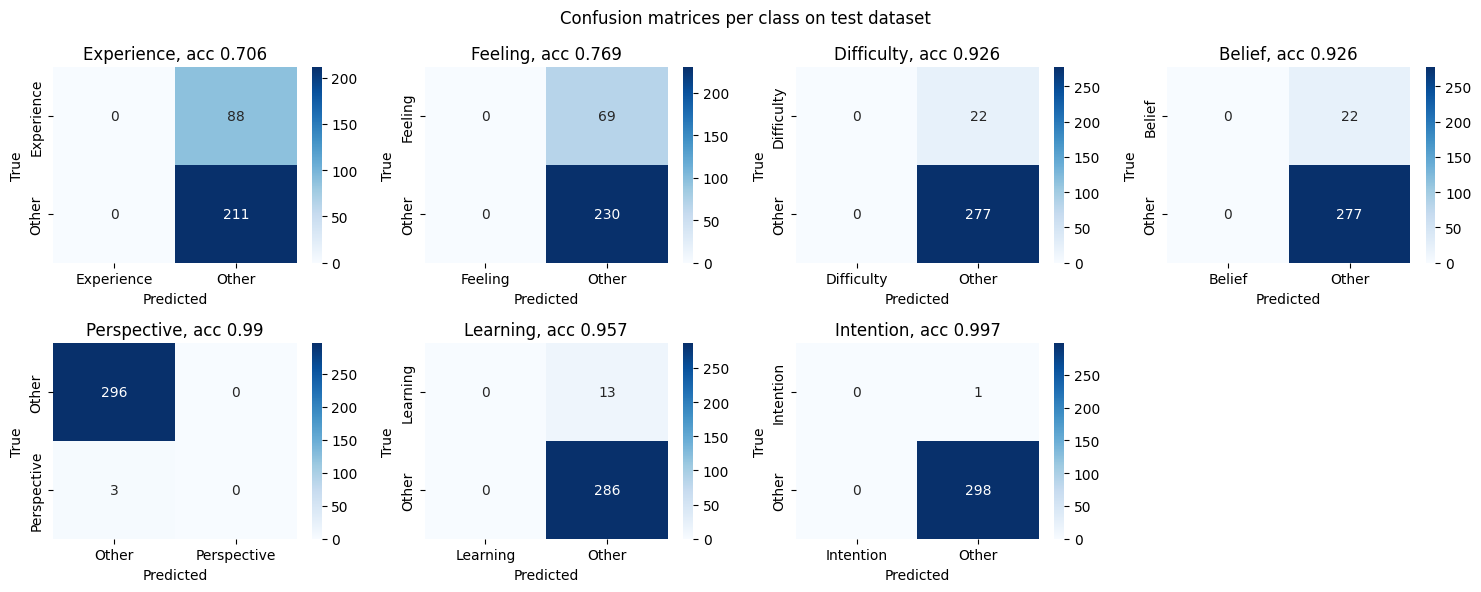

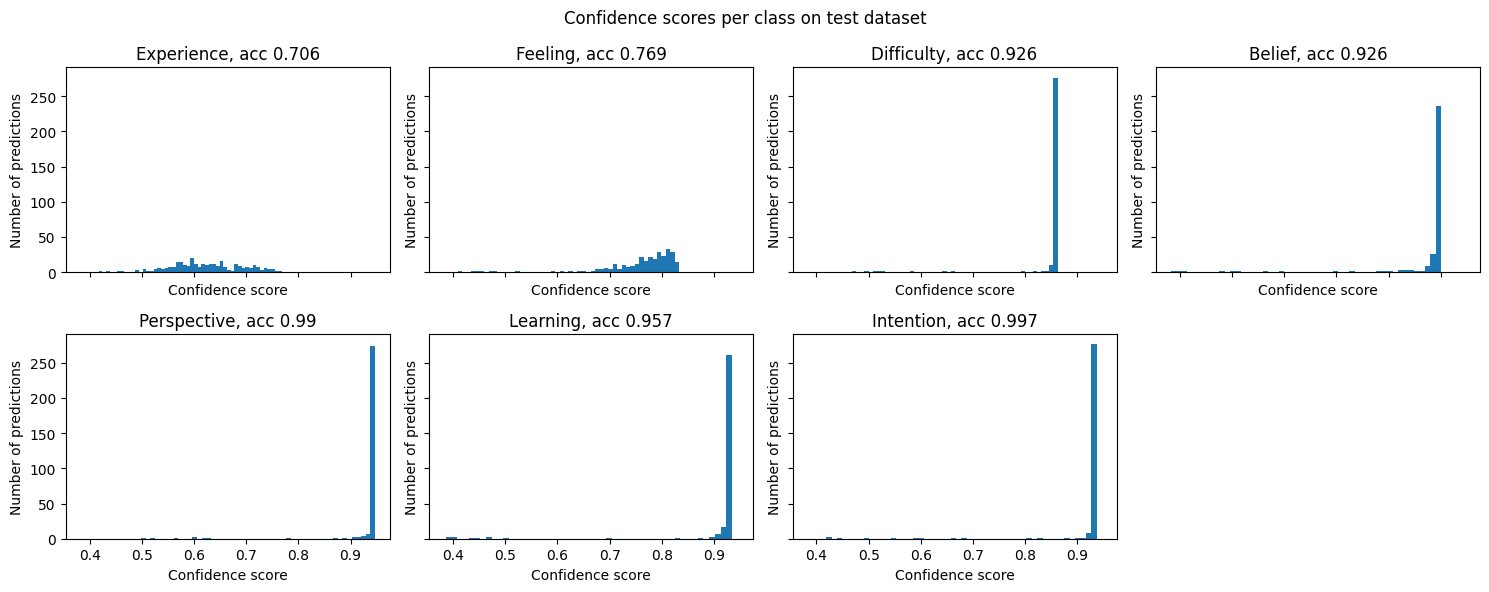

In [133]:
# Load test dataset
df_sentences_test = pd.read_csv('./../reflection-classification/data/sentences/en/test/sentences.tsv',sep='\t')
# Remove 'Reflection' from the dataset
df_sentences_test = df_sentences_test[df_sentences_test['y'] != 'Reflection']
# Replace "Difficulties" with "Difficulty" like in the train dataset
df_sentences_test.loc[df_sentences_test['y'] == 'Difficulties', 'y'] = 'Difficulty'

print(f"\nOverall accuracy of multiple binary clf : {np.mean(accuracies_bin).round(4)}")
# Weighted average accuracy
weights = [len(df_sentences_test[df_sentences_test['y'] == cat]) for cat in reflective_categories]
# Calculate the weighted average
weighted_avg = np.round(sum(w * v for w, v in zip(weights, accuracies_bin)) / sum(weights),4)
print(f"\nWeights : {weights}")
print(f"Weigted accuracy of multiple binary clf : {weighted_avg}")

fig, axs = plt.subplots(2, 4, figsize=(15, 6)) 
print(reflective_categories)

for i, cat in enumerate(reflective_categories):
    ax = axs[i // 4, i % 4]
    # Create confusion matrix
    cm = confusion_matrix(true_labels_df[cat][0], predicted_labels_df[cat][0], labels=class_labels[i])
    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels[i], yticklabels=class_labels[i], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(f"{cat}, acc {np.round(accuracies_bin[i],3)}")
    
fig.delaxes(axs[1, 3])
plt.suptitle(f"Confusion matrices per class on test dataset")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 4, figsize=(15, 6), sharex = True, sharey = True) 

for i, cat in enumerate(reflective_categories):
    ax = axs[i // 4, i % 4]
    
    # Confidence Scores Histogram
    ax.hist(pred_confidence_df[cat], bins=50)
    ax.set_xlabel('Confidence score')
    ax.set_ylabel('Number of predictions')
    ax.set_title(f"{cat}, acc {np.round(accuracies_bin[i],3)}")

fig.delaxes(axs[1, 3])
plt.suptitle(f"Confidence scores per class on test dataset")
plt.tight_layout()
plt.show()

In [ ]:
---

3